# Analysis of Historical Wind Speed and Wind Farms in Ireland

## Introduction

This project aims to analyze historical wind speed data across various weather stations in Ireland and examine the distribution and characteristics of wind farms in the country. The analysis includes:

1. **Data Collection**: Gathering wind speed data from multiple weather stations across different counties in Ireland.
2. **Data Processing**: Cleaning and merging the data to create a comprehensive dataset for analysis.
3. **Statistical Analysis**: Calculating mean wind speeds, both historically and for the period from 2012 to 2022, and analyzing seasonal variations.
4. **Visualization**: Creating visual representations of the data, including bar plots, line plots, and choropleth maps, to illustrate wind speed trends and the distribution of wind farms.
5. **Geospatial Analysis**: Using GeoPandas to map the locations of weather stations and wind farms, and to visualize wind speed data geographically.

The project leverages various Python libraries such as Pandas, GeoPandas, and Matplotlib for data manipulation, analysis, and visualization. The insights gained from this analysis can help in understanding wind patterns in Ireland and assessing the potential for wind energy development.

## Windfarm Distribution and Recommendations

I will be reviewing the current distribution of windfarms in Ireland and assessing the potential for further windfarm development. The analysis will focus on the following key steps:

1. **Review the Current Distribution of Windfarms**: Analyze the existing distribution of windfarms across Ireland to identify areas with high and low concentrations of wind turbines.
2. **Assess Wind Speed Data**: Evaluate the historical wind speed data to determine the suitability of different regions for windfarm development.
3. **Identify Potential Areas for Development**: Based on the wind speed data and current windfarm distribution, suggest regions that could be further explored for windfarm development.
4. **Conduct Geospatial Analysis**: Use geospatial analysis to visualize the potential areas for windfarm development and assess their feasibility.

These steps will help in making informed recommendations for future windfarm development in Ireland.

### Limitations of the Data

While the wind speed data provides valuable insights, there are several limitations to consider:

- **Incomplete Coverage**: Not all weather stations in Ireland measure wind speed. This results in gaps in the data, particularly in counties without stations that record wind speed. Consequently, the analysis may not fully represent the wind conditions across the entire country.
- **Spatial Distribution**: The spatial distribution of weather stations is uneven. Some counties, especially those along the western coast, have multiple stations measuring wind speed, while others have none. This uneven distribution can lead to biased results, with certain regions being overrepresented in the analysis.
- **Temporal Gaps**: The data from some weather stations may have temporal gaps due to periods when the stations were not operational or when wind speed measurements were not recorded. These gaps can affect the accuracy of the historical wind speed analysis.
- **Measurement Consistency**: Different weather stations may use varying methods and instruments to measure wind speed, leading to inconsistencies in the data. Calibration differences and changes in measurement techniques over time can also impact the comparability of wind speed data from different stations.
- **Geospatial Analysis Limitations**: The geospatial analysis relies on the accuracy of the geographic coordinates of the weather stations. Any errors in the coordinates can affect the mapping and visualization of wind speed data.
- **Wind Farm Data**: The wind farm data used in the analysis may not be exhaustive, as it only includes wind farms that were operational or planned as of June 2022. New wind farms or changes in existing ones may not be reflected in the data.

These limitations should be considered when interpreting the results of the wind speed analysis and making recommendations for wind energy development.

## Libraries Imported

The following Python libraries are used in this project for data manipulation, analysis, and visualization:

- **Pandas**: For data manipulation and analysis, including reading and merging CSV files.
- **GeoPandas**: For geospatial data manipulation and analysis, including reading shapefiles and creating GeoDataFrames.
- **Matplotlib**: For creating static, animated, and interactive visualizations in Python.
- **NumPy**: For numerical operations and handling arrays.
- **Matplotlib.patheffects**: For adding path effects to text in Matplotlib plots.

These libraries provide the necessary tools to handle and analyze the wind speed data and wind farm distribution in Ireland.

In [76]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.dates as mdates
import numpy as np

## Data Collection and Processing

In this segment, the focus is on reading the wind speed data from various weather stations across Ireland and processing it for further analysis. The steps involved are as follows:

1. **Setting Directory Paths**: The directory paths where the data files are stored are defined. This includes directories for historical wind speed data, maps, and wind farm data.

2. **Defining County Folders and File Names**: The folder names for each county and the corresponding CSV file names for the weather stations are specified.

3. **Reading CSV Files**: The CSV files for each weather station are read using `pandas.read_csv()`. The data is read with specific parameters such as skipping rows, handling bad lines, and selecting relevant columns (`date` and `wdsp`).

4. **Creating a Comprehensive DataFrame**: A new DataFrame `df_windspeed_ireland` is created with the `date` column from the oldest online weather station (Valentia Observatory). This serves as the base for merging data from other stations.

5. **Converting Wind Speed Columns to Numeric**: Before merging, the `wdsp` columns are converted to numeric values to handle any non-numeric entries.

6. **Merging DataFrames**: The DataFrames from each weather station are merged into the comprehensive DataFrame `df_windspeed_ireland` on the `date` column. This ensures that the dates align correctly across all stations.

7. **Calculating Mean Wind Speeds**: The mean wind speeds for each station are calculated, both historically and for the period from 2012 to 2022. The dates are also grouped by trimester and the mean wind speed for each trimester is calculated.

8. **Cleaning Station Details**: The station details are sorted by station name and columns for the mean wind speeds are added to the station details DataFrame. Unnecessary columns are also dropped to clean the DataFrame.

This process results in a comprehensive dataset that includes historical wind speed data from multiple weather stations, ready for further analysis and visualization.

In [77]:
# 1 - Set directory folder
dir = '../project/HistWindSpeedIreland/'
dir2 = '../project/ROI_map/'
dir3 = '../project/WindFarmsIreland/'

# 2a - Set the county folder names
carlow = 'carlow/'
cavan = 'cavan/'
clare = 'clare/'
cork = 'cork/'
donegal = 'donegal/'
dublin = 'dublin/'
galway = 'galway/'
kerry = 'kerry/'
kildare = 'kildare/'
kilkenny = 'kilkenny/'
laois = 'laois/'
leitrim = 'leitrim/'
limerick = 'limerick/'
longford = 'longford/'
louth = 'louth/'
mayo = 'mayo/'
meath = 'meath/'
monaghan = 'monaghan/'
offaly = 'offaly/'
roscommon = 'roscommon/'
sligo = 'sligo/'
tipperary = 'tipperary/'
waterford = 'waterford/'
westmeath = 'westmeath/'
wexford = 'wexford/'
wicklow = 'wicklow/'

# 2b - Set the file variables
oakpark_csv = 'oak-park.csv'
ballyhaise_csv = 'ballyhaise.csv'
shannon_csv = 'shannon-airport.csv'
cork_airport_csv = 'cork-airport.csv'
moore_park_csv = 'moore-park.csv'
roches_point_csv = 'roches-point.csv'
sherkin_island_csv = 'sherkin-island.csv'
finner_csv = 'finner.csv'
malin_head_csv = 'malin-head.csv'
casement_csv = 'casement.csv'
dublin_airport_csv = 'dublin-airport.csv'
athenry_csv = 'athenry.csv'
mace_head_csv = 'mace-head.csv'
valentia_csv = 'valentia-observatory.csv'
belmullet_csv = 'belmullet.csv'
claremorris_csv = 'claremorris.csv'
knock_airport_csv = 'knock-airport.csv'
newport_csv = 'newport.csv'
dunsany_csv = 'dunsany.csv'
mt_dillon_csv = 'mt-dillon.csv'
gurteen_csv = 'gurteen.csv'
mullingar_csv = 'mullingar.csv'
johnstown_castle_2_csv = 'johnstown-castle-2.csv'
station_datails_csv = 'windspeed-stationdetails-meteireann.csv'
irl_map_shp = 'IRL_adm1.shp'
windfarms_shp = 'wind_farms_june_2022.shp'
windfarms_csv = 'wind_farms_june_2022.csv'

# 3 - Read the csv files
df_oakpark = pd.read_csv(dir + carlow + oakpark_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_ballyhaise = pd.read_csv(dir + cavan + ballyhaise_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_shannon = pd.read_csv(dir + clare + shannon_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_cork_airport = pd.read_csv(dir + cork + cork_airport_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_moore_park = pd.read_csv(dir + cork + moore_park_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_roches_point = pd.read_csv(dir + cork + roches_point_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_sherkin_island = pd.read_csv(dir + cork + sherkin_island_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_finner = pd.read_csv(dir + donegal + finner_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_malin_head = pd.read_csv(dir + donegal + malin_head_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_casement = pd.read_csv(dir + dublin + casement_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_dublin_airport = pd.read_csv(dir + dublin + dublin_airport_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_athenry = pd.read_csv(dir + galway + athenry_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_mace_head = pd.read_csv(dir + galway + mace_head_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_valentia = pd.read_csv(dir + kerry + valentia_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_belmullet = pd.read_csv(dir + mayo + belmullet_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_claremorris = pd.read_csv(dir + mayo + claremorris_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_knock_airport = pd.read_csv(dir + mayo + knock_airport_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_newport = pd.read_csv(dir + mayo + newport_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_dunsany = pd.read_csv(dir + meath + dunsany_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_mt_dillon = pd.read_csv(dir + roscommon + mt_dillon_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_gurteen = pd.read_csv(dir + tipperary + gurteen_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_mullingar = pd.read_csv(dir + westmeath + mullingar_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_johnstown_castle_2 = pd.read_csv(dir + wexford + johnstown_castle_2_csv, sep=',', on_bad_lines='skip', skiprows=24, usecols=['date', 'wdsp'])
df_station_datails = pd.read_csv(dir + station_datails_csv, sep=',', on_bad_lines='skip')
df_windfarms = pd.read_csv(dir3 + windfarms_csv, sep=',', on_bad_lines='skip')

In [78]:
# 4 - Create a new DataFrame with the 'date' column from the oldest online weather station (df_valentia or df_dublin_airport)
df_windspeed_ireland = df_valentia[['date']].copy()

# 5 - Convert 'wdsp' columns to numeric before merging
df_athenry['wdsp'] = pd.to_numeric(df_athenry['wdsp'], errors='coerce')
df_ballyhaise['wdsp'] = pd.to_numeric(df_ballyhaise['wdsp'], errors='coerce')
df_belmullet['wdsp'] = pd.to_numeric(df_belmullet['wdsp'], errors='coerce')
df_casement['wdsp'] = pd.to_numeric(df_casement['wdsp'], errors='coerce')
df_claremorris['wdsp'] = pd.to_numeric(df_claremorris['wdsp'], errors='coerce')
df_cork_airport['wdsp'] = pd.to_numeric(df_cork_airport['wdsp'], errors='coerce')
df_dublin_airport['wdsp'] = pd.to_numeric(df_dublin_airport['wdsp'], errors='coerce')
df_dunsany['wdsp'] = pd.to_numeric(df_dunsany['wdsp'], errors='coerce')
df_finner['wdsp'] = pd.to_numeric(df_finner['wdsp'], errors='coerce')
df_gurteen['wdsp'] = pd.to_numeric(df_gurteen['wdsp'], errors='coerce')
df_johnstown_castle_2['wdsp'] = pd.to_numeric(df_johnstown_castle_2['wdsp'], errors='coerce')
df_knock_airport['wdsp'] = pd.to_numeric(df_knock_airport['wdsp'], errors='coerce')
df_mace_head['wdsp'] = pd.to_numeric(df_mace_head['wdsp'], errors='coerce')
df_malin_head['wdsp'] = pd.to_numeric(df_malin_head['wdsp'], errors='coerce')
df_moore_park['wdsp'] = pd.to_numeric(df_moore_park['wdsp'], errors='coerce')
df_mt_dillon['wdsp'] = pd.to_numeric(df_mt_dillon['wdsp'], errors='coerce')
df_mullingar['wdsp'] = pd.to_numeric(df_mullingar['wdsp'], errors='coerce')
df_newport['wdsp'] = pd.to_numeric(df_newport['wdsp'], errors='coerce')
df_oakpark['wdsp'] = pd.to_numeric(df_oakpark['wdsp'], errors='coerce')
df_roches_point['wdsp'] = pd.to_numeric(df_roches_point['wdsp'], errors='coerce')
df_shannon['wdsp'] = pd.to_numeric(df_shannon['wdsp'], errors='coerce')
df_sherkin_island['wdsp'] = pd.to_numeric(df_sherkin_island['wdsp'], errors='coerce')
df_valentia['wdsp'] = pd.to_numeric(df_valentia['wdsp'], errors='coerce')

In [79]:
# 6 - Merge each DataFrame on the 'date' column to ensure the dates align correctly
df_windspeed_ireland = df_windspeed_ireland.merge(df_athenry[['date', 'wdsp']], on='date', how='left', suffixes=('', '_athenry'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_ballyhaise[['date', 'wdsp']], on='date', how='left', suffixes=('', '_ballyhaise'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_belmullet[['date', 'wdsp']], on='date', how='left', suffixes=('', '_belmullet'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_casement[['date', 'wdsp']], on='date', how='left', suffixes=('', '_casement'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_claremorris[['date', 'wdsp']], on='date', how='left', suffixes=('', '_claremorris'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_cork_airport[['date', 'wdsp']], on='date', how='left', suffixes=('', '_cork_airport'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_dublin_airport[['date', 'wdsp']], on='date', how='left', suffixes=('', '_dublin_airport'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_dunsany[['date', 'wdsp']], on='date', how='left', suffixes=('', '_dunsany'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_finner[['date', 'wdsp']], on='date', how='left', suffixes=('', '_finner'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_gurteen[['date', 'wdsp']], on='date', how='left', suffixes=('', '_gurteen'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_johnstown_castle_2[['date', 'wdsp']], on='date', how='left', suffixes=('', '_johnstown_castle_2'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_knock_airport[['date', 'wdsp']], on='date', how='left', suffixes=('', '_knock_airport'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_mace_head[['date', 'wdsp']], on='date', how='left', suffixes=('', '_mace_head'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_malin_head[['date', 'wdsp']], on='date', how='left', suffixes=('', '_malin_head'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_moore_park[['date', 'wdsp']], on='date', how='left', suffixes=('', '_moore_park'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_mt_dillon[['date', 'wdsp']], on='date', how='left', suffixes=('', '_mt_dillon'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_mullingar[['date', 'wdsp']], on='date', how='left', suffixes=('', '_mullingar'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_newport[['date', 'wdsp']], on='date', how='left', suffixes=('', '_newport'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_oakpark[['date', 'wdsp']], on='date', how='left', suffixes=('', '_oakpark'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_roches_point[['date', 'wdsp']], on='date', how='left', suffixes=('', '_roches_point'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_shannon[['date', 'wdsp']], on='date', how='left', suffixes=('', '_shannon'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_sherkin_island[['date', 'wdsp']], on='date', how='left', suffixes=('', '_sherkin_island'))
df_windspeed_ireland = df_windspeed_ireland.merge(df_valentia[['date', 'wdsp']], on='date', how='left', suffixes=('', '_valentia'))
df_windspeed_ireland.rename(columns={'wdsp': 'wdsp_athenry'}, inplace=True)

# 7a - Add a column with the stations mean wdsp
mean_wdsp = df_windspeed_ireland.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').mean()

# 7b - Add a column with the stations mean wdsp from 2012 to 2022
mean_wdsp_2012_2022 = df_windspeed_ireland[(df_windspeed_ireland['date'] >= '01-01-2012') & (df_windspeed_ireland['date'] <= '31-12-2022')].iloc[:, 1:].apply(pd.to_numeric, errors='coerce').mean()

# 7c - Rename the columns
df_mean_wdsp = mean_wdsp.rename_axis('station').reset_index(name='mean_wdsp')
df_mean_wdsp_2012_2022 = mean_wdsp_2012_2022.rename_axis('station').reset_index(name='mean_wdsp_2012_2022')

# 8a - Sort Station Details by station name
df_station_datails = df_station_datails.sort_values(by='name')

# 8b - Add the mean windspeed to the station details DataFrame
df_station_datails['mean_wdsp'] = df_mean_wdsp['mean_wdsp']
df_station_datails['mean_wdsp_2012_2022'] = df_mean_wdsp_2012_2022['mean_wdsp_2012_2022']

# 8c - Drop columns that are not needed
df_station_datails_clean = df_station_datails.drop(columns=['easting', 'northing', 'close_year'])

## Calculating Trimester/Quarterly Means and Updating Station Details

In this segment, we focus on calculating the mean wind speeds for each trimester (quarter) and updating the station details DataFrame accordingly. The steps involved are as follows:

1. **Grouping Dates by Trimester**: The wind speed data is grouped by trimester using the `resample('QE')` method, which calculates the mean wind speed for each trimester.

2. **Calculating Mean Wind Speeds for Each Trimester**: The mean wind speed for each trimester is calculated for the entire dataset and for the period from 2012 to 2022.

3. **Transposing the DataFrame**: The resulting DataFrame is transposed to have stations as rows and trimesters as columns. This makes it easier to merge with the station details DataFrame.

4. **Renaming Columns and Index**: The columns and index of the transposed DataFrame are renamed for clarity.

5. **Merging DataFrames**: The transposed DataFrame is merged with the station details DataFrame to include the trimester mean wind speeds.

// Note: A column for the mean wind speeds from 2012-2022 was created to analyze if the wind speed data from the past 10 years prior to the last recorded data of the windfarms in Ireland remains consistent when compared to the historical data.

In [80]:
# 1 - Group the dates by trimester
df_windspeed_ireland['date'] = pd.to_datetime(df_windspeed_ireland['date'])
df_windspeed_ireland_trimester = df_windspeed_ireland.set_index('date').resample('QE').mean()

# 2a - Calculate the mean windspeed for each trimester
mean_wdsp_trimester = df_windspeed_ireland_trimester.groupby(df_windspeed_ireland_trimester.index.quarter).mean()

# 2b - Calculate the mean windspeed for each trimester from 2012 to 2022
df_windspeed_ireland_trimester_2012_2022 = df_windspeed_ireland[(df_windspeed_ireland['date'] >= '01-01-2012') & (df_windspeed_ireland['date'] <= '31-12-2022')].set_index('date').resample('QE').mean()
mean_wdsp_trimester_2012_2022 = df_windspeed_ireland_trimester_2012_2022.groupby(df_windspeed_ireland_trimester_2012_2022.index.quarter).mean()


C:\Users\caina\AppData\Local\Temp\ipykernel_19488\1768137625.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_windspeed_ireland['date'] = pd.to_datetime(df_windspeed_ireland['date'])


In [81]:
# 3 - Transpose the dataframe
mean_wdsp_trimester_transposed = mean_wdsp_trimester.T
mean_wdsp_trimester_transposed_2012_2022 = mean_wdsp_trimester_2012_2022.T

# 4a - Rename the columns
mean_wdsp_trimester_transposed.columns = ['Q1', 'Q2', 'Q3', 'Q4']
mean_wdsp_trimester_transposed_2012_2022.columns = ['Q1_2012_2022', 'Q2_2012_2022', 'Q3_2012_2022', 'Q4_2012_2022']

# 4b - Rename the index
mean_wdsp_trimester_transposed.index.name = 'station'
mean_wdsp_trimester_transposed_2012_2022.index.name = 'station'

# 4c - Turn the index into a column
mean_wdsp_trimester_transposed.reset_index(inplace=True)
mean_wdsp_trimester_transposed_2012_2022.reset_index(inplace=True)

# 5a - Merge the two dataframes
df_mean_wdsp_trimester = mean_wdsp_trimester_transposed.merge(mean_wdsp_trimester_transposed_2012_2022, on='station', how='left')

# 5b - Add the trimester mean windspeed to the station details DataFrame

df_station_datails_clean['Q1'] = df_mean_wdsp_trimester['Q1']
df_station_datails_clean['Q2'] = df_mean_wdsp_trimester['Q2']
df_station_datails_clean['Q3'] = df_mean_wdsp_trimester['Q3']
df_station_datails_clean['Q4'] = df_mean_wdsp_trimester['Q4']
df_station_datails_clean['Q1_2012_2022'] = df_mean_wdsp_trimester['Q1_2012_2022']
df_station_datails_clean['Q2_2012_2022'] = df_mean_wdsp_trimester['Q2_2012_2022']
df_station_datails_clean['Q3_2012_2022'] = df_mean_wdsp_trimester['Q3_2012_2022']
df_station_datails_clean['Q4_2012_2022'] = df_mean_wdsp_trimester['Q4_2012_2022']



## Visualizing the Station Details

In this segment, we visualize the station details to gain insights into the wind speed data across various weather stations in Ireland. Here are some quick observations:

- **Mean Wind Speed**: The mean wind speed varies significantly across different stations, with Mace Head and Malin Head recording the highest mean wind speeds, while Moore Park and Belmullet have the lowest.
- **Quarterly Mean Wind Speeds**: The quarterly mean wind speeds show seasonal variations, with higher wind speeds generally observed in the first and fourth quarters of the year.
- **Recent Trends**: Comparing the historical mean wind speeds with the mean wind speeds from 2012 to 2022, we observe that the recent decade's wind speeds are consistent with the historical data, indicating stable wind patterns over time.
- **Geospatial Distribution**: The geospatial analysis reveals that stations located along the western coast of Ireland tend to have higher wind speeds, which is consistent with the prevailing wind patterns in the region.



In [82]:
# Vizuallize the station details
df_station_datails_clean = df_station_datails_clean.round(2)
df_station_datails_clean.head()

county  station_name         name  height(m)  latitude  longitude  \
11  Galway          1875      ATHENRY         40     53.29      -8.79   
1    Cavan           675   BALLYHAISE         78     54.05      -7.31   
14    Mayo          2375    BELMULLET          9     54.23     -10.01   
10  Dublin          3723     CASEMENT         91     53.31      -6.44   
15    Mayo          2175  CLAREMORRIS         68     53.71      -8.99   

    open_year  mean_wdsp  mean_wdsp_2012_2022     Q1    Q2    Q3    Q4  \
11       2010       9.44                 9.43  10.49  9.06  8.48  9.74   
1        2003       6.41                 6.40   7.28  6.05  5.63  6.66   
14       2012       5.91                 5.90   6.46  5.96  5.37  5.84   
10       1944       8.48                 8.47   8.97  8.18  7.38  8.80   
15       2010       7.09                 7.09   7.79  7.04  6.61  7.06   

    Q1_2012_2022  Q2_2012_2022  Q3_2012_2022  Q4_2012_2022  
11         10.61          8.90          8.19          9.47  
1           7.36          5.88          5.34          6.53  
14          6.73          6.05          5.34          5.97  
10          9.74          8.21          7.68          9.36  
15          7.74          6.78          6.08          6.69

## Insights on Mean Wind Speed Data by County

The `df_means` DataFrame provides a comprehensive overview of the mean wind speeds across various counties in Ireland. Here are some key insights:

- **Overall Mean Wind Speed**: The mean wind speed varies significantly across different counties. Counties like Kerry and Cork exhibit higher mean wind speeds, making them potentially more suitable for wind energy projects.
- **Recent Trends (2012-2022)**: The mean wind speeds from 2012 to 2022 are consistent with the historical data, indicating stable wind patterns over time. This consistency is crucial for the reliability of wind energy production.
- **Quarterly Variations**: The quarterly mean wind speeds show seasonal variations. Generally, higher wind speeds are observed in the first (Q1) and fourth (Q4) quarters of the year, which aligns with the typical seasonal wind patterns in Ireland.
- **County-Specific Observations**:
    - **Kerry and Cork**: Show high mean wind speeds, indicating strong potential for wind energy development.
    - **Donegal**: Although Donegal has a historical mean wind speed of 9.13 knots, which is just barely enough to turn on a turbine (8-9 knots) and many wind farms being built there over the years, it may not be the most ideal location for wind energy projects.
    - **Counties with Lower Wind Speeds**: Counties like Carlow and Cavan have lower mean wind speeds, which might make them less ideal for large-scale wind energy projects. If a county has a mean wind speed of less than 9 knots, it is not practical for wind energy generation as the turbines would not generate energy.


In [83]:
# Create dataframe with the means wind speed for each county
df_county_mean_wdsp_quarters = df_station_datails_clean.groupby('county')[['mean_wdsp', 'mean_wdsp_2012_2022', 'Q1', 'Q2', 'Q3', 'Q4', 'Q1_2012_2022', 'Q2_2012_2022', 'Q3_2012_2022', 'Q4_2012_2022']].mean().reset_index()

# Rename the columns
df_county_mean_wdsp_quarters.columns = ['County', 'Mean_Wind_Speed', 'Mean_Wind_Speed_2012_2022', 'Q1', 'Q2', 'Q3', 'Q4', 'Q1_2012_2022', 'Q2_2012_2022', 'Q3_2012_2022', 'Q4_2012_2022']

# Round the values to two decimal places
df_means = df_county_mean_wdsp_quarters.round(2)

# Vizuallize the means
df_means.head(20)

County  Mean_Wind_Speed  Mean_Wind_Speed_2012_2022     Q1     Q2  \
0      Carlow             7.22                       7.21   7.87   7.16   
1       Cavan             6.41                       6.40   7.28   6.05   
2       Clare            12.70                      12.69  14.05  11.78   
3        Cork             9.88                       9.88  11.32   9.12   
4     Donegal             9.13                       9.12  10.27   8.50   
5      Dublin             8.35                       8.34   9.07   7.98   
6      Galway            11.93                      11.92  13.10  10.85   
7       Kerry            15.21                      15.21  17.46  13.32   
8        Mayo             7.43                       7.42   8.26   7.25   
9       Meath             7.38                       7.37   8.18   6.95   
10  Roscommon            12.22                      12.22  13.66  11.23   
11  Tipperary             9.59                       9.59  10.48   9.29   
12  Westmeath            12.32                      12.31  13.91  11.06   
13    Wexford            10.16                      10.15  11.54   9.37   

       Q3     Q4  Q1_2012_2022  Q2_2012_2022  Q3_2012_2022  Q4_2012_2022  
0    6.57   7.24          8.17          7.21          6.43          7.26  
1    5.63   6.66          7.36          5.88          5.34          6.53  
2   11.44  13.54         13.48         10.98         10.43         12.74  
3    8.59  10.50         10.73          8.80          8.25          9.86  
4    8.16   9.57         10.62          8.48          8.01          9.55  
5    7.40   8.66          9.65          8.00          7.46          8.97  
6   10.76  12.98         13.64         10.82         10.56         12.95  
7   13.00  17.11         17.22         12.92         12.65         16.49  
8    6.68   7.57          8.05          6.95          6.19          7.15  
9    6.79   7.53          8.52          6.91          6.63          7.64  
10  10.68  13.29         13.59         11.20         10.71         13.43  
11   8.85   9.77         10.05          8.73          8.20          9.04  
12  10.57  13.78         14.63         11.23         10.45         14.03  
13   8.68  11.05         11.09          8.61          8.03         10.36

# Plotting

***

## Historical Mean Wind Speed for each station in Ireland since 2012

The plot visualizes the average wind speeds recorded at various weather stations across Ireland over a period starting from the year 2012. Each data point on the plot represents the mean wind speed calculated from historical data collected at a specific station.

The x-axis of the plot lists the names of the weather stations, while the y-axis shows the mean wind speed values, measured in knots. This plot helps in identifying patterns and trends in wind speeds across different regions of Ireland, which can be crucial for various applications such as wind energy production, weather forecasting, and climate studies.

The plot reveals significant variations in historical mean wind speeds across different weather stations in Ireland. Notably, stations such as Mace Head and Malin Head exhibit the highest mean wind speeds, indicating strong wind conditions that are favorable for wind energy production. Conversely, stations like Moore Park and Belmullet show lower mean wind speeds, suggesting less potential for wind energy generation in those areas. Seasonal trends are also evident, with higher wind speeds typically observed in the first and fourth quarters of the year, aligning with the expected seasonal wind patterns. This analysis is crucial for identifying optimal locations for wind energy projects and understanding regional wind behavior.

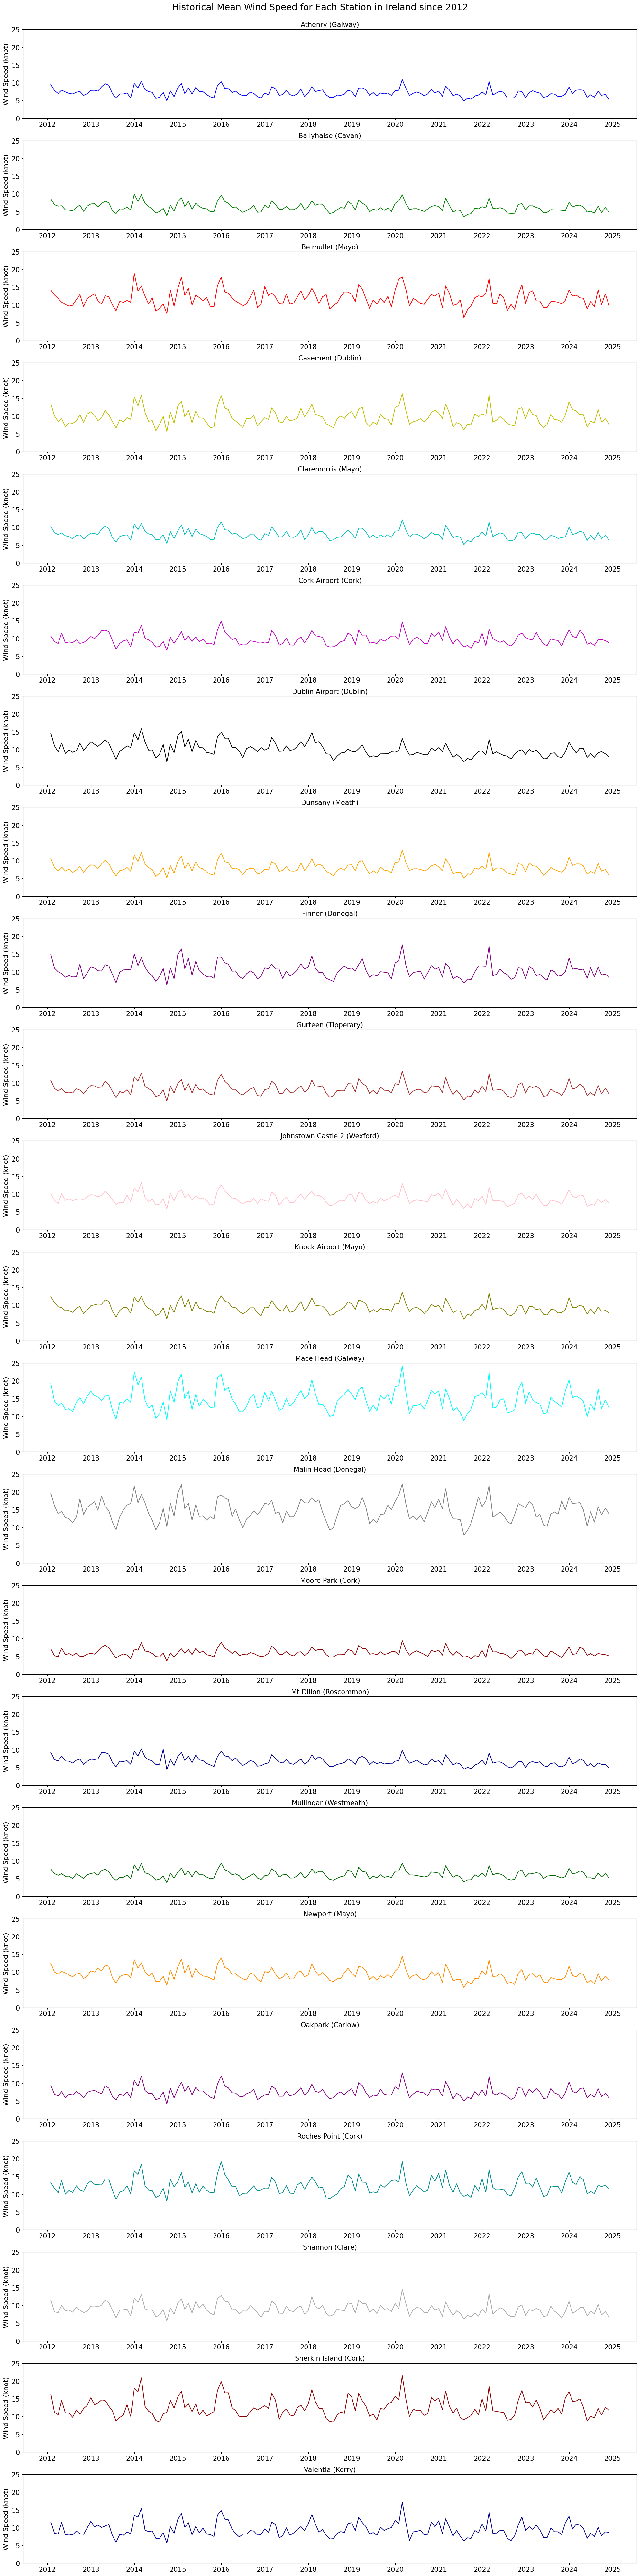

In [84]:
# Plot the historical mean wind speed for each station in different subplots
fig, axes = plt.subplots(nrows=23, ncols=1, figsize=(20, 80))
fig.suptitle('Historical Mean Wind Speed for Each Station in Ireland since 2012', fontsize=20, y=1)

# Filter data since 2012
df_windspeed_ireland = df_windspeed_ireland[df_windspeed_ireland['date'] >= '2012-01-01']

# Group by month and calculate the mean wind speed for each station
df_windspeed_ireland = df_windspeed_ireland.set_index('date').resample('ME').mean().reset_index()

stations = [
    ('wdsp_athenry', 'Athenry (Galway)', 'b'),
    ('wdsp_ballyhaise', 'Ballyhaise (Cavan)', 'g'),
    ('wdsp_belmullet', 'Belmullet (Mayo)', 'r'),
    ('wdsp_casement', 'Casement (Dublin)', 'y'),
    ('wdsp_claremorris', 'Claremorris (Mayo)', 'c'),
    ('wdsp_cork_airport', 'Cork Airport (Cork)', 'm'),
    ('wdsp_dublin_airport', 'Dublin Airport (Dublin)', 'k'),
    ('wdsp_dunsany', 'Dunsany (Meath)', 'orange'),
    ('wdsp_finner', 'Finner (Donegal)', 'purple'),
    ('wdsp_gurteen', 'Gurteen (Tipperary)', 'brown'),
    ('wdsp_johnstown_castle_2', 'Johnstown Castle 2 (Wexford)', 'pink'),
    ('wdsp_knock_airport', 'Knock Airport (Mayo)', 'olive'),
    ('wdsp_mace_head', 'Mace Head (Galway)', 'cyan'),
    ('wdsp_malin_head', 'Malin Head (Donegal)', 'grey'),
    ('wdsp_moore_park', 'Moore Park (Cork)', 'darkred'),
    ('wdsp_mt_dillon', 'Mt Dillon (Roscommon)', 'darkblue'),
    ('wdsp_mullingar', 'Mullingar (Westmeath)', 'darkgreen'),
    ('wdsp_newport', 'Newport (Mayo)', 'darkorange'),
    ('wdsp_oakpark', 'Oakpark (Carlow)', 'purple'),
    ('wdsp_roches_point', 'Roches Point (Cork)', 'darkcyan'),
    ('wdsp_shannon', 'Shannon (Clare)', 'darkgrey'),
    ('wdsp_sherkin_island', 'Sherkin Island (Cork)', 'darkred'),
    ('wdsp_valentia', 'Valentia (Kerry)', 'darkblue')
]

for i, (col, title, color) in enumerate(stations):
    axes[i].plot(df_windspeed_ireland['date'], df_windspeed_ireland[col], color=color)
    axes[i].set_title(title, fontsize=15)
    axes[i].set_ylabel('Wind Speed (knot)', fontsize=15)
    axes[i].set_yticks(range(0, 26, 5))
    axes[i].tick_params(axis='y', labelsize=15)
    axes[i].tick_params(axis='x', labelsize=15)
    axes[i].xaxis.set_major_locator(mdates.YearLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

## Mean Wind Speed in each County

The plot "Mean Wind Speed in each County" provides a visual representation of the average wind speeds recorded across various counties in Ireland and compares it with the same from 2012 to 2022. This analysis is crucial for understanding regional wind patterns and identifying potential areas for wind energy development. 

However, it is important to note the limitations of this data and plot. For instance, Donegal has two weather stations that measure wind speed: Malin Head and Finner. These stations are located far apart, with Malin Head recording one of the highest mean wind speeds in Ireland, while Finner has a relatively low mean wind speed. 

Because the calculations were made by averaging the wind speeds from all stations within each county, the high mean wind speed at Malin Head was significantly reduced by the lower mean wind speed at Finner. As a result, the overall mean wind speed for Donegal falls below 9 knots, which is insufficient to generate electricity from a wind turbine. This example highlights the potential inaccuracies that can arise when averaging data from multiple stations within a county, especially when the stations are widely dispersed and exhibit significant variations in wind speed. This also highlights the necessesity of more stations across the country.

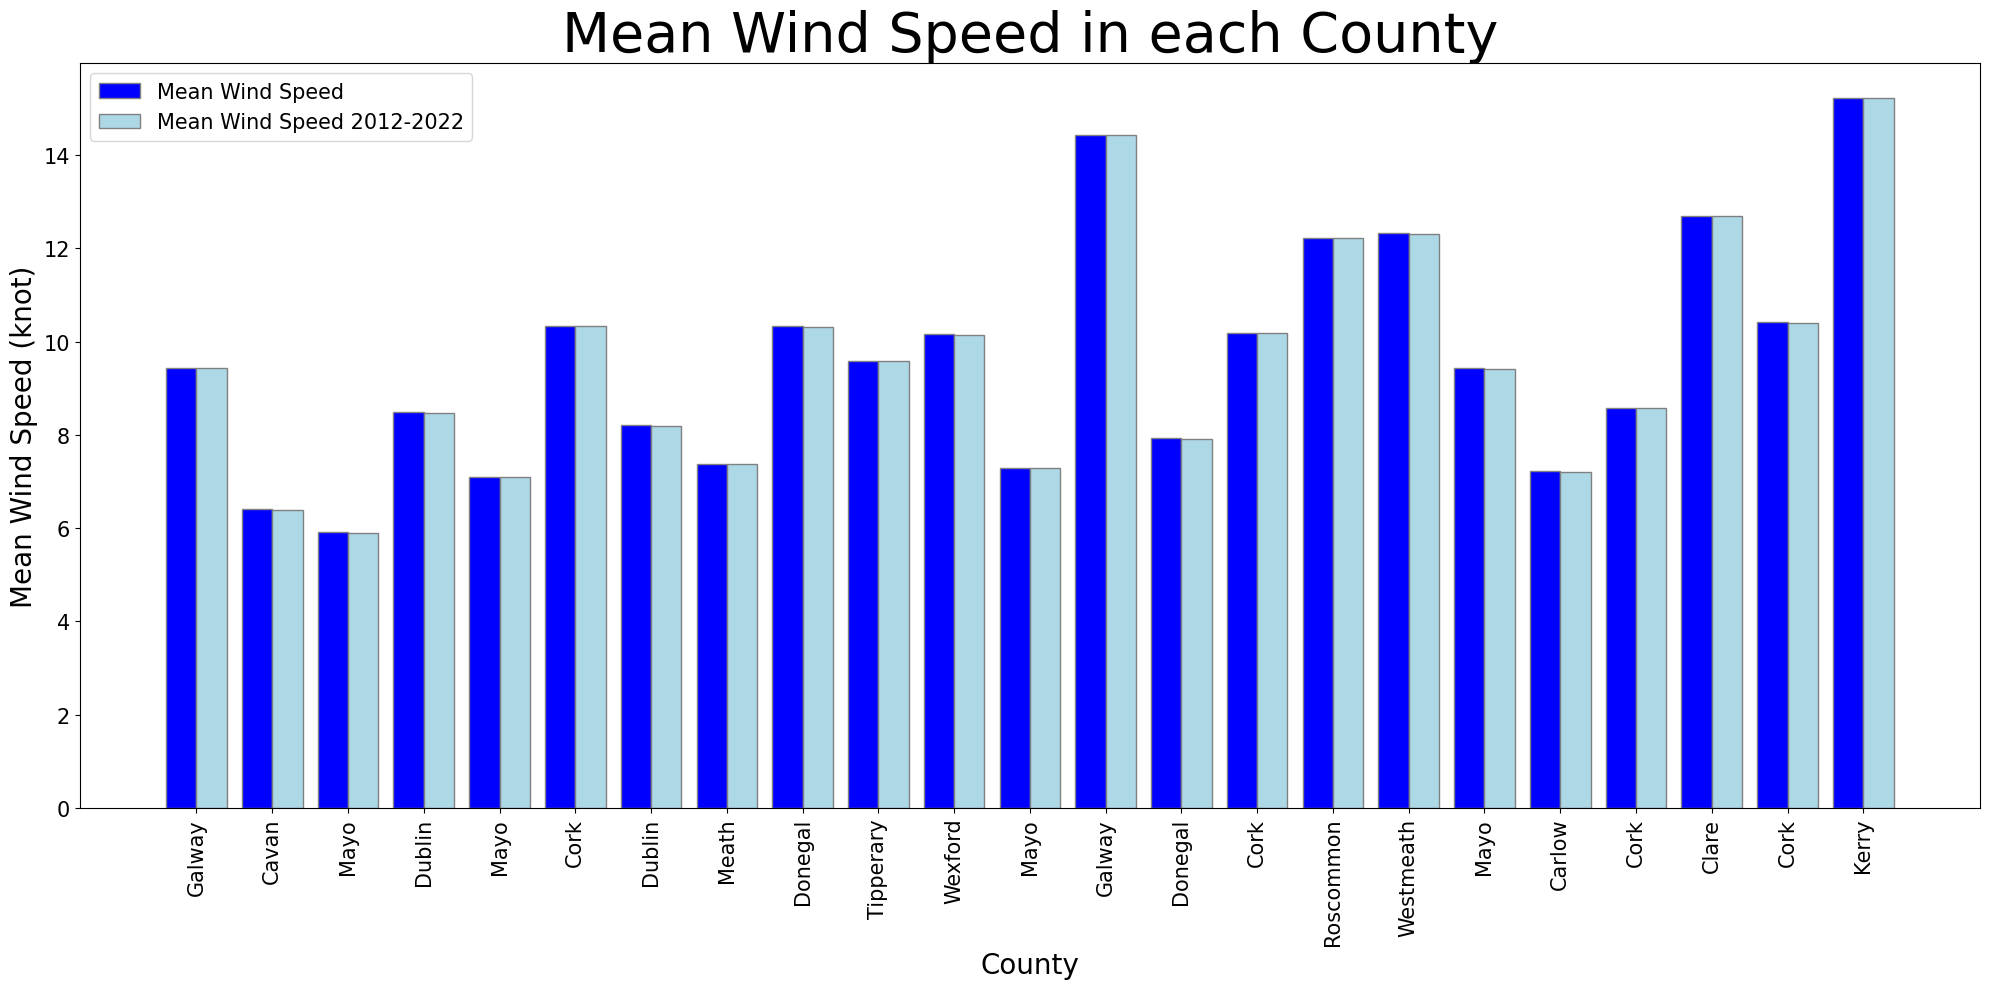

In [85]:
# Plot
bar_width = 0.4
r1 = np.arange(len(df_station_datails_clean['county']))
r2 = [x + bar_width for x in r1]

# Plot the historical mean wind speed for each county for Q1 and Q2
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the historical mean wind speed for each county per quarter
ax.bar(r1, df_station_datails_clean['mean_wdsp'], color='b', width=bar_width, edgecolor='grey', label='Mean Wind Speed')
ax.bar(r2, df_station_datails_clean['mean_wdsp_2012_2022'], color='lightblue', width=bar_width, edgecolor='grey', label='Mean Wind Speed 2012-2022')

ax.set_xlabel('County', fontsize=20)
ax.set_ylabel('Mean Wind Speed (knot)', fontsize=20)
ax.set_title('Mean Wind Speed in each County', fontsize=40)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks([r + bar_width / 2 for r in range(len(df_station_datails_clean['county']))])
ax.set_xticklabels(df_station_datails_clean['county'], rotation=90, fontsize=15)
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()

## Historical Mean Wind Speed in each County per Quarter

The plot provides a detailed visualization of the average wind speeds recorded across various counties in Ireland, broken down by quarter. This analysis is crucial for understanding seasonal wind patterns and identifying potential areas for wind energy development.

Key observations from the plot include:

- **Seasonal Variations**: The plot reveals significant seasonal variations in wind speeds across different counties. Generally, higher wind speeds are observed in the first (Q1) and fourth (Q4) quarters of the year, which aligns with the typical seasonal wind patterns in Ireland.
- **County-Specific Trends**: Counties like Kerry, Clare, Roscosmmom, Westmeath and Galway exhibit higher mean wind speeds consistently across all quarters, making them potentially more suitable for wind energy projects, having an all year wind speed superior to 9 knots. In contrast, counties like Carlow, Cavan, Mayo and Meath show lower mean wind speeds, which might make them less ideal for large-scale wind energy projects.
- **Consistency Over Time**: The mean wind speeds from 2012 to 2022 are consistent with the historical data, indicating stable wind patterns over time. This consistency is crucial for the reliability of wind energy production.

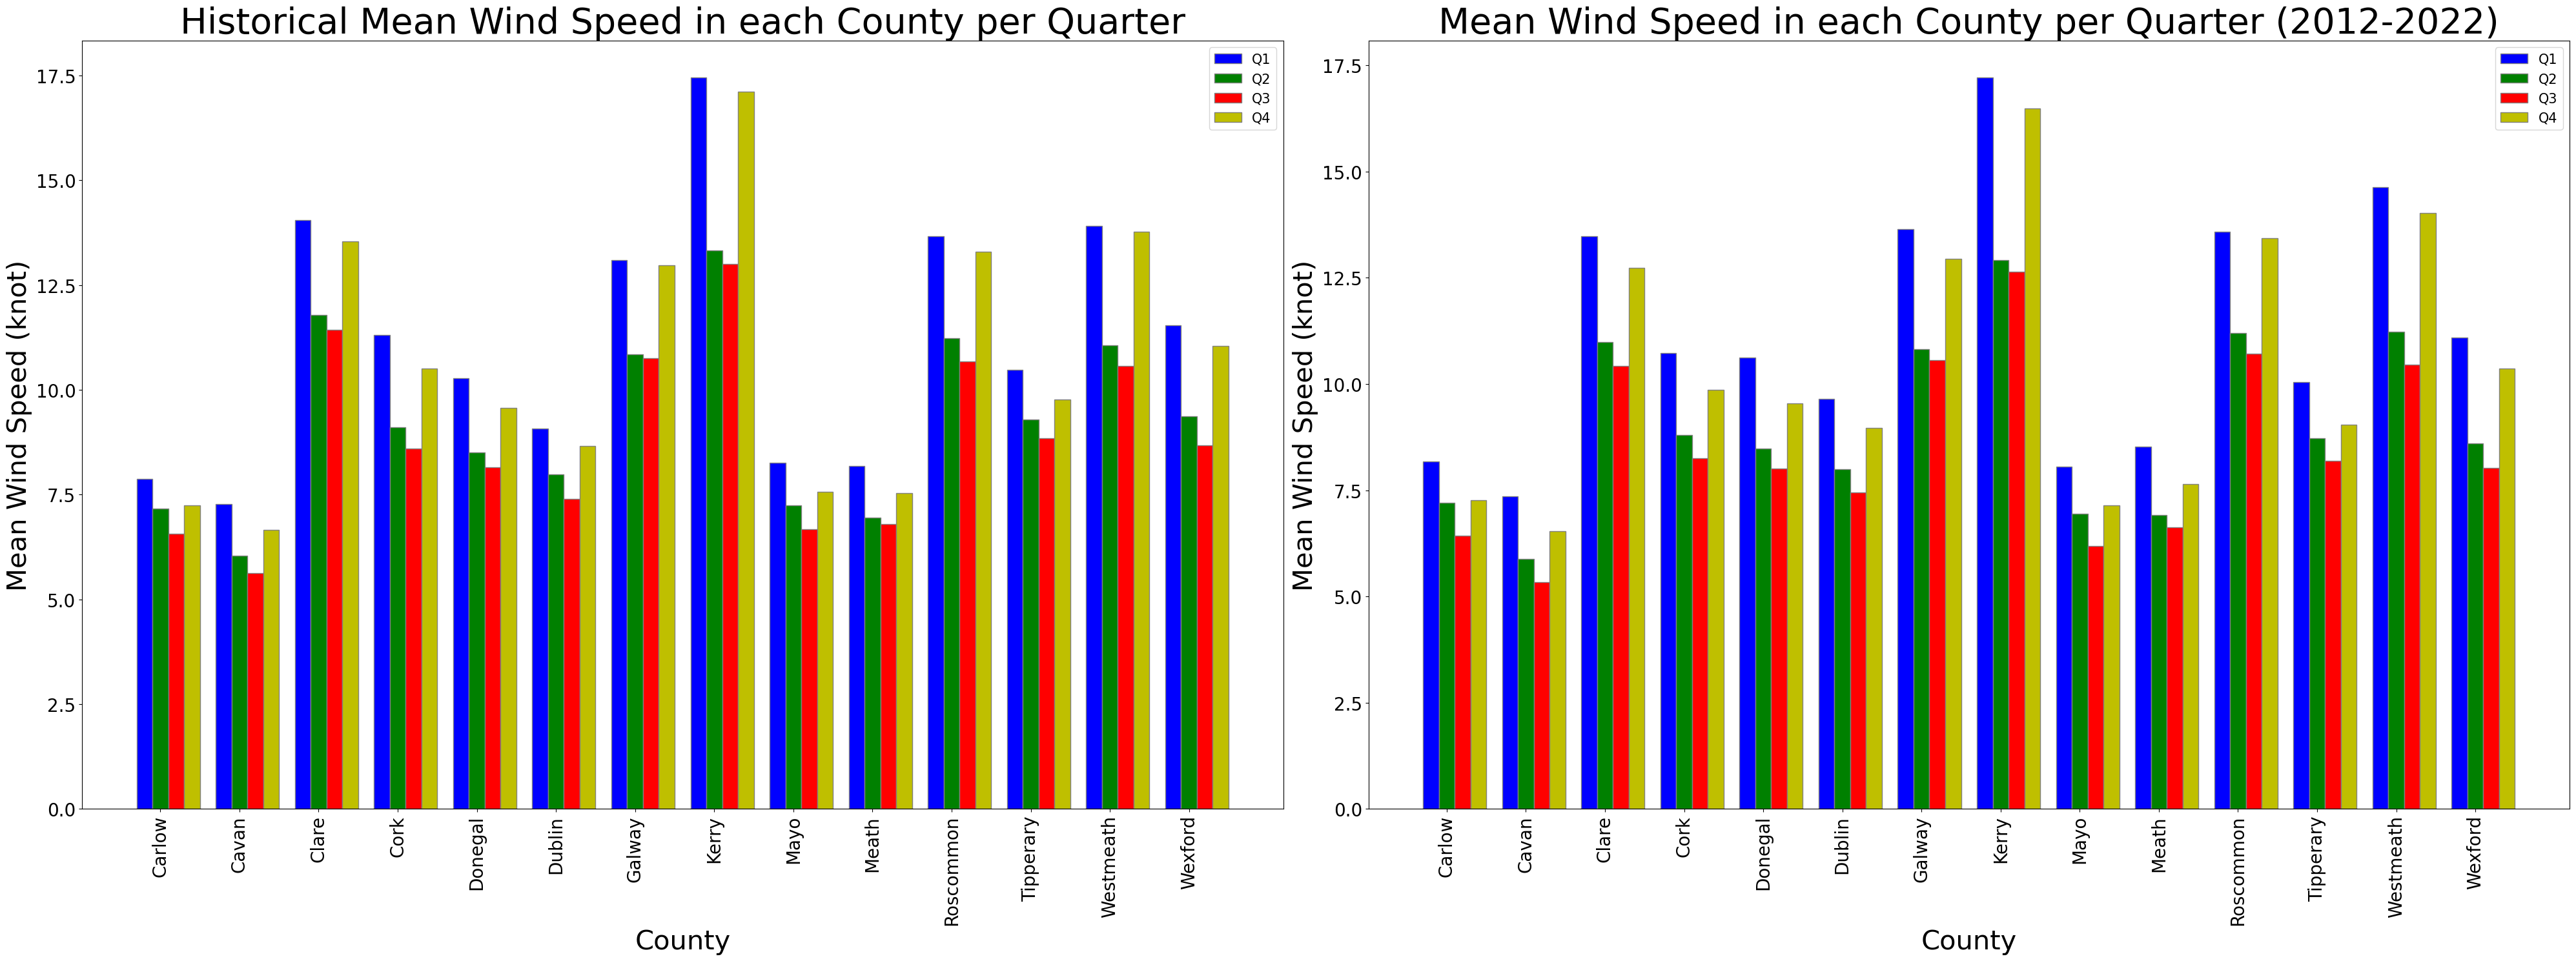

In [86]:
# Plot
bar_width = 0.2
r1 = np.arange(len(df_county_mean_wdsp_quarters['County']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 15))

# Plot the historical mean wind speed for each county per quarter
axes[0].bar(r1, df_county_mean_wdsp_quarters['Q1'], color='b', width=bar_width, edgecolor='grey', label='Q1')
axes[0].bar(r2, df_county_mean_wdsp_quarters['Q2'], color='g', width=bar_width, edgecolor='grey', label='Q2')
axes[0].bar(r3, df_county_mean_wdsp_quarters['Q3'], color='r', width=bar_width, edgecolor='grey', label='Q3')
axes[0].bar(r4, df_county_mean_wdsp_quarters['Q4'], color='y', width=bar_width, edgecolor='grey', label='Q4')

axes[0].set_xlabel('County', fontsize=30)
axes[0].set_ylabel('Mean Wind Speed (knot)', fontsize=30)
axes[0].set_title('Historical Mean Wind Speed in each County per Quarter', fontsize=40)
axes[0].tick_params(axis='y', labelsize=20)
axes[0].set_xticks([r + bar_width for r in range(len(df_county_mean_wdsp_quarters['County']))])
axes[0].set_xticklabels(df_county_mean_wdsp_quarters['County'], rotation=90, fontsize=20)
axes[0].legend(fontsize=15)

# Plot the mean wind speed for each county per quarter from 2012 to 2022
r1 = np.arange(len(df_county_mean_wdsp_quarters['County']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

axes[1].bar(r1, df_county_mean_wdsp_quarters['Q1_2012_2022'], color='b', width=bar_width, edgecolor='grey', label='Q1')
axes[1].bar(r2, df_county_mean_wdsp_quarters['Q2_2012_2022'], color='g', width=bar_width, edgecolor='grey', label='Q2')
axes[1].bar(r3, df_county_mean_wdsp_quarters['Q3_2012_2022'], color='r', width=bar_width, edgecolor='grey', label='Q3')
axes[1].bar(r4, df_county_mean_wdsp_quarters['Q4_2012_2022'], color='y', width=bar_width, edgecolor='grey', label='Q4')

axes[1].set_xlabel('County',fontsize=30)
axes[1].set_ylabel('Mean Wind Speed (knot)', fontsize=30)
axes[1].set_title('Mean Wind Speed in each County per Quarter (2012-2022)', fontsize=40)
axes[1].tick_params(axis='y', labelsize=20)
axes[1].set_xticks([r + bar_width for r in range(len(df_county_mean_wdsp_quarters['County']))])
axes[1].set_xticklabels(df_county_mean_wdsp_quarters['County'], rotation=90, fontsize=20)
axes[1].legend(fontsize=15)

plt.tight_layout()
plt.show()

## Mean Wind Speed in Ireland from 2012-2022

The plot provides a visual representation of the average wind speeds recorded across various counties in Ireland. The color gradient indicates the mean wind speed, with darker shades representing higher wind speeds. 

Counties colored in white do not have any weather stations that measure wind speed parameters, highlighting a significant limitation in the data coverage. This lack of data can lead to an incomplete understanding of wind patterns in those regions.

Key observations from the plot include:

- **High Wind Speed Regions**: Counties along the western coast, such as Kerry, Galway, and Donegal, exhibit higher mean wind speeds. These areas are known for their strong wind conditions, making them suitable for wind energy projects.
- **Low Wind Speed Regions**: Counties in the midlands and eastern parts of Ireland, such as Carlow and Kildare, show lower mean wind speeds, which might make them less ideal for wind energy development.
- **Data Gaps**: The absence of wind speed data in several counties (colored in white) underscores the need for more weather stations to provide a comprehensive analysis of wind patterns across the entire country.

Note: Again, here we can see how far some of the stations are from each other. Showing again the need to stress the limitations previous explained.

C:\Users\caina\AppData\Local\Temp\ipykernel_19488\1911119202.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(roi_map.geometry.centroid.x, roi_map.geometry.centroid.y, roi_map.NAME_1):


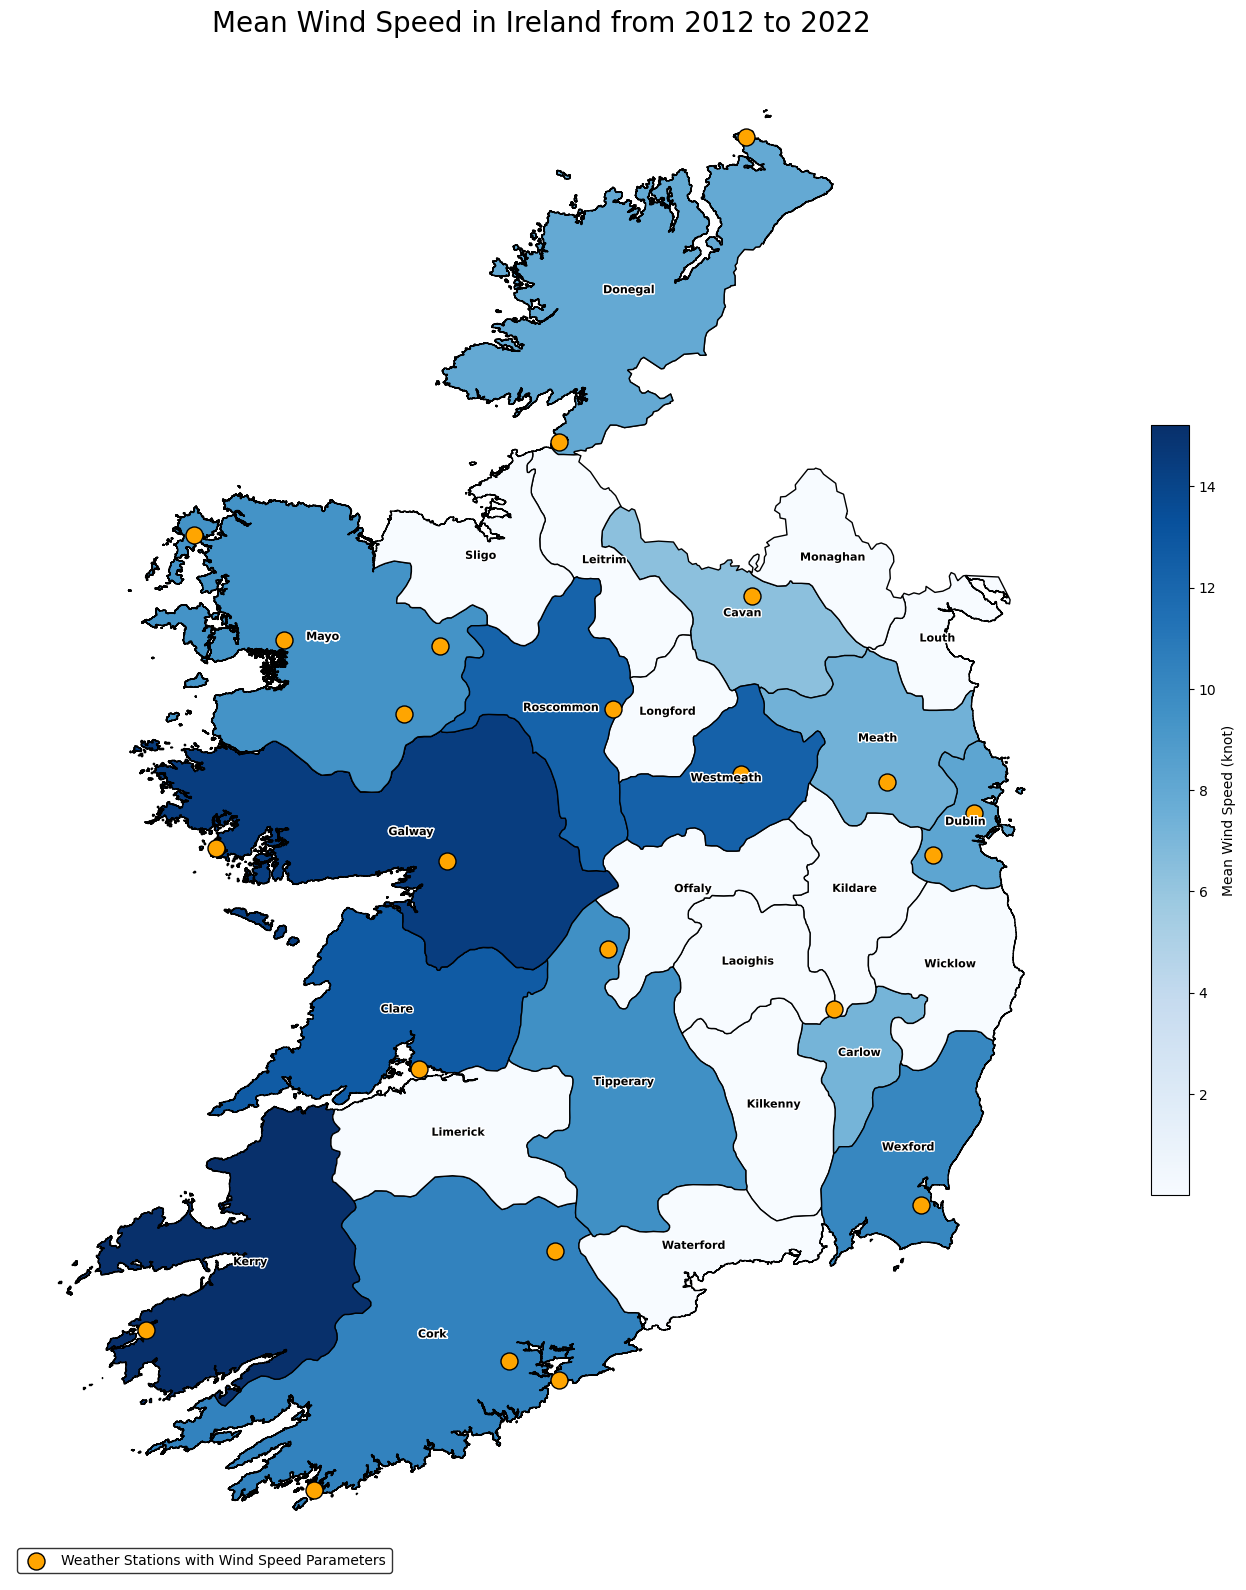

In [87]:
# Create a GeoDataFrame from the station details DataFrame
gdf = gpd.GeoDataFrame(df_station_datails, geometry=gpd.points_from_xy(df_station_datails.longitude, df_station_datails.latitude, crs='EPSG:4326'))

# Read the map of Ireland
roi_map = gpd.read_file(dir2 + irl_map_shp)

# Merge roi_map with df_station_datails to include mean_wdsp
roi_map = roi_map.merge(df_station_datails_clean[['county', 'mean_wdsp_2012_2022']], left_on='NAME_1', right_on='county', how='left')

# Replace NaN values with 0
roi_map['mean_wdsp_2012_2022'] = roi_map['mean_wdsp_2012_2022'].fillna(0)

# Plot the map of Ireland with a larger figure size and add the mean wind speed as a choropleth map
fig, ax = plt.subplots(figsize=(20, 20))
roi_map.plot(ax=ax, column='mean_wdsp_2012_2022', cmap='Blues', edgecolor="black", 
             legend=True, markersize=100, 
             legend_kwds={'label': "Mean Wind Speed (knot)", 
                          'shrink': 0.5,
                          'ticks': np.arange(2, 30, 2)})

# Add county names
for x, y, label in zip(roi_map.geometry.centroid.x, roi_map.geometry.centroid.y, roi_map.NAME_1):
    
    txt = ax.text(x, y, label, fontsize=8, ha='center', color='black', weight='bold')
    txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="orange", edgecolor="black", markersize=150)

# Add a title
plt.title('Mean Wind Speed in Ireland from 2012 to 2022', fontsize=20)

# Remove the axis
plt.axis('off')

# Add legend to the weather stations
legend = ax.legend(["Weather Stations with Wind Speed Parameters"], loc='lower left', frameon=True)
legend.get_frame().set_edgecolor('black')
plt.show()

## Mean Wind Speed in Ireland (2012 - 2022) with mean wind speeds between 9 and 29 knot

Some counties lost their color as they did not exhibit a mean wind speed superior to 9 knots. This threshold is crucial for wind energy generation, as wind turbines typically require a minimum wind speed to operate and generate energy.

It's important to note that Donegal was excluded due to the limitation of averaging the data. Donegal has two weather stations, Malin Head and Finner, which are located far apart and exhibit significantly different wind speeds. Malin Head records one of the highest mean wind speeds in Ireland, while Finner has a relatively low mean wind speed. Averaging these values results in an overall mean wind speed for Donegal that falls below the 9-knot threshold, despite the high wind speeds at Malin Head. This highlights the need for more weather stations to provide a comprehensive analysis of wind patterns across the entire county.

C:\Users\caina\AppData\Local\Temp\ipykernel_19488\3380499249.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(roi_map.geometry.centroid.x, roi_map.geometry.centroid.y, roi_map.NAME_1):


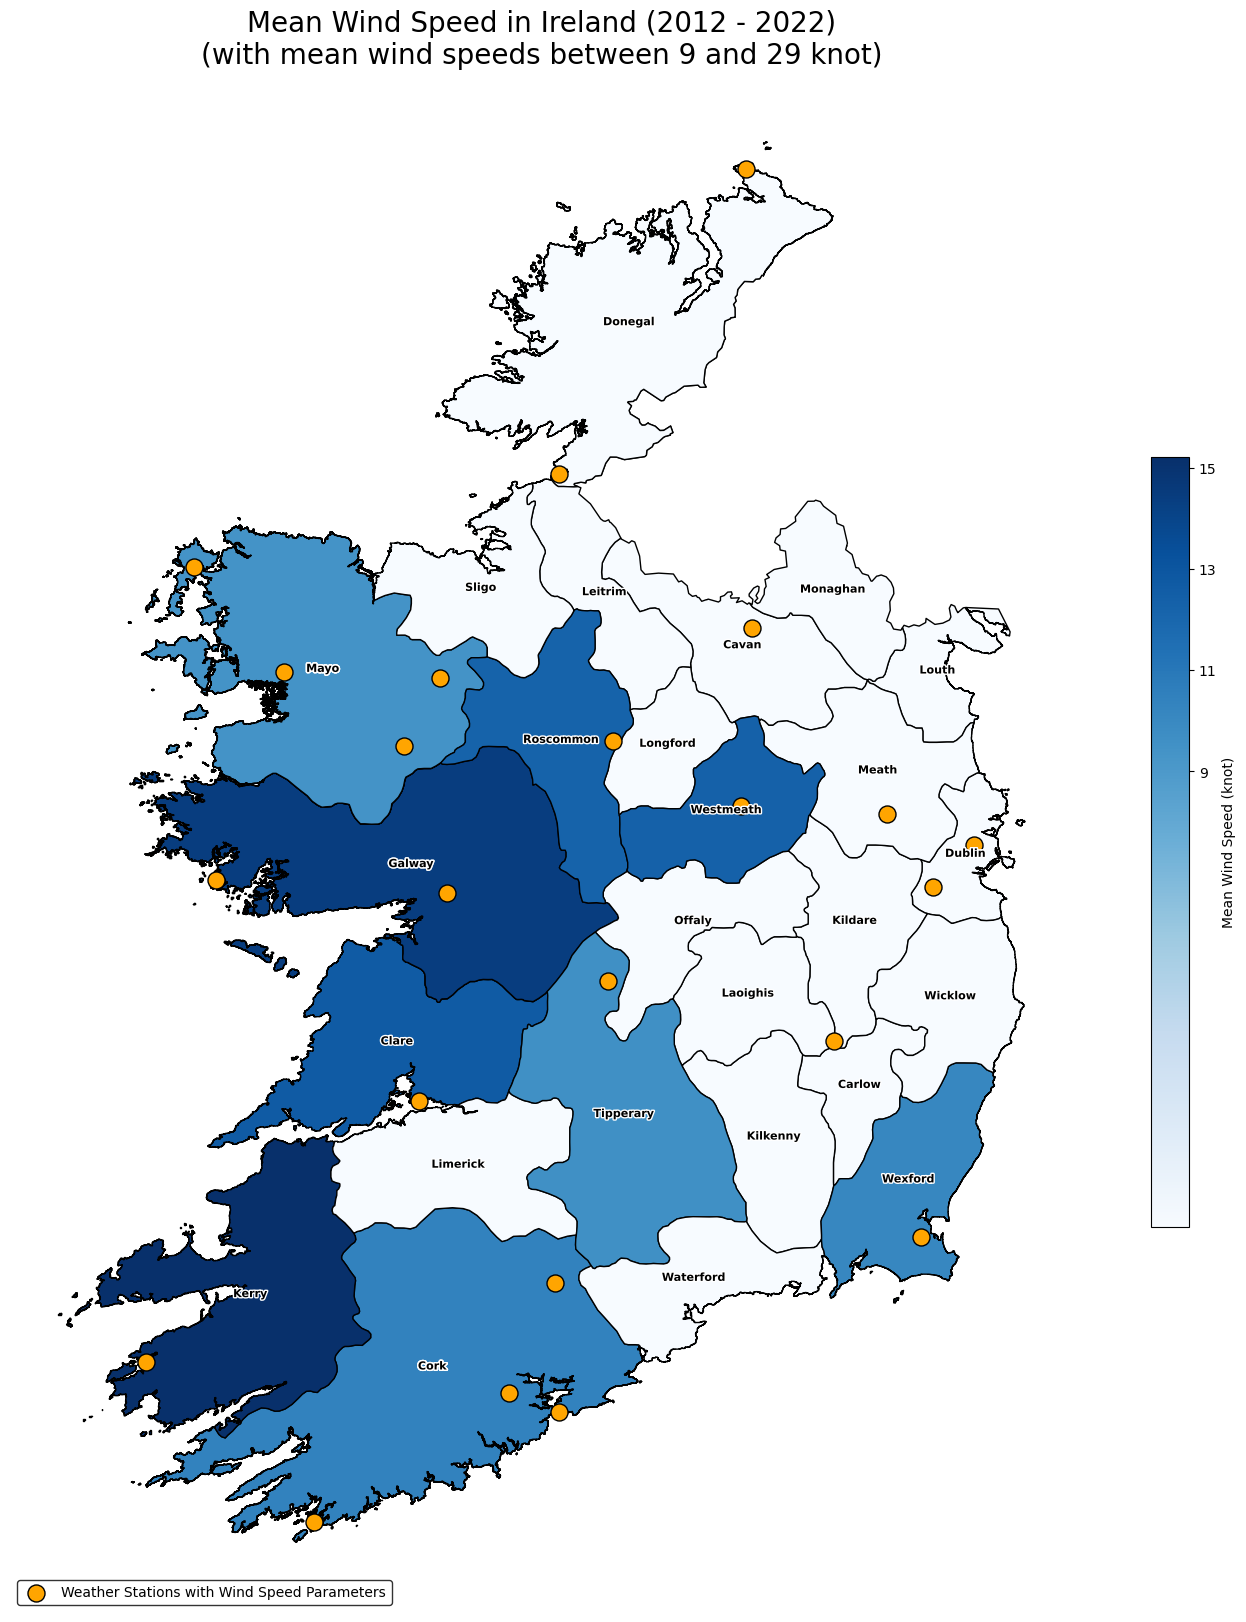

In [88]:
# Create a GeoDataFrame from the station details DataFrame
gdf = gpd.GeoDataFrame(df_station_datails, geometry=gpd.points_from_xy(df_station_datails.longitude, df_station_datails.latitude, crs='EPSG:4326'))

# Read the map of Ireland
roi_map = gpd.read_file(dir2 + irl_map_shp)

# Merge roi_map with df_station_datails to include mean_wdsp_2012_2022
roi_map = roi_map.merge(df_station_datails_clean[['county', 'mean_wdsp_2012_2022']], left_on='NAME_1', right_on='county', how='left')

# Replace NaN values with 0
roi_map['mean_wdsp_2012_2022'] = roi_map['mean_wdsp_2012_2022'].fillna(0)

# Set values outside the range 9 to 29 to 0
roi_map.loc[(roi_map['mean_wdsp_2012_2022'] < 9) | (roi_map['mean_wdsp_2012_2022'] > 29), 'mean_wdsp_2012_2022'] = 0

# Plot the map of Ireland with a larger figure size and add the mean wind speed as a choropleth map
fig, ax = plt.subplots(figsize=(20, 20))
roi_map.plot(ax=ax, column='mean_wdsp_2012_2022', cmap='Blues', edgecolor="black", 
             legend=True, markersize=100, 
             legend_kwds={'label': "Mean Wind Speed (knot)", 
                          'shrink': 0.5, 
                          'ticks': np.arange(9, 30, 2)})

# Add county names
for x, y, label in zip(roi_map.geometry.centroid.x, roi_map.geometry.centroid.y, roi_map.NAME_1):
    
    txt = ax.text(x, y, label, fontsize=8, ha='center', color='black', weight='bold')
    txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="orange", edgecolor="black", markersize=150)

# Add a title
plt.title('Mean Wind Speed in Ireland (2012 - 2022)\n(with mean wind speeds between 9 and 29 knot)', fontsize=20)

# Remove the axis
plt.axis('off')

# Add legend to the weather stations
legend = ax.legend(["Weather Stations with Wind Speed Parameters"], loc='lower left', frameon=True)
legend.get_frame().set_edgecolor('black')
plt.show()

## Number of Wind Turbines in each County (June 2022)

The plot provides a visual representation of the distribution of wind turbines across various counties in Ireland as of June 2022. This analysis aims to highlight key insights and trends observed from the data.

### Key Observations:

1. **County with the Most Wind Turbines**:
   - The county with the highest number of wind turbines is Donegal, indicating a significant investment in wind energy infrastructure in this region. This could be due to favorable wind conditions, available land, or supportive local policies.

2. **Counties with Moderate Numbers of Wind Turbines**:
   - Several counties, such as Cork, Kerry, and Tipperary, have a moderate number of wind turbines. These regions contribute substantially to the overall wind energy production but do not dominate the landscape as much as the leading county.

3. **Counties with Few or No Wind Turbines**:
   - Some counties, such as Kildare and Laois/Laoighis, Longford, and Westmeath have very few or no wind turbines. This could be due to various factors such as less favorable wind conditions, higher population density, or other land use priorities.

### Analysis:

- **Geographical Factors**:
  - The distribution of wind turbines is likely influenced by geographical factors such as wind speed and consistency, terrain, and proximity to the electrical grid. Counties with higher average wind speeds and open landscapes are more likely to have a higher concentration of wind turbines.

- **Economic and Policy Factors**:
  - Economic incentives and local government policies play a crucial role in the development of wind farms. Counties with supportive policies and incentives for renewable energy projects tend to attract more investments in wind energy.

- **Environmental Impact**:
  - The environmental impact of wind turbines, including effects on local wildlife and noise pollution, may also influence their distribution. Counties with stringent environmental regulations may have fewer wind turbines.

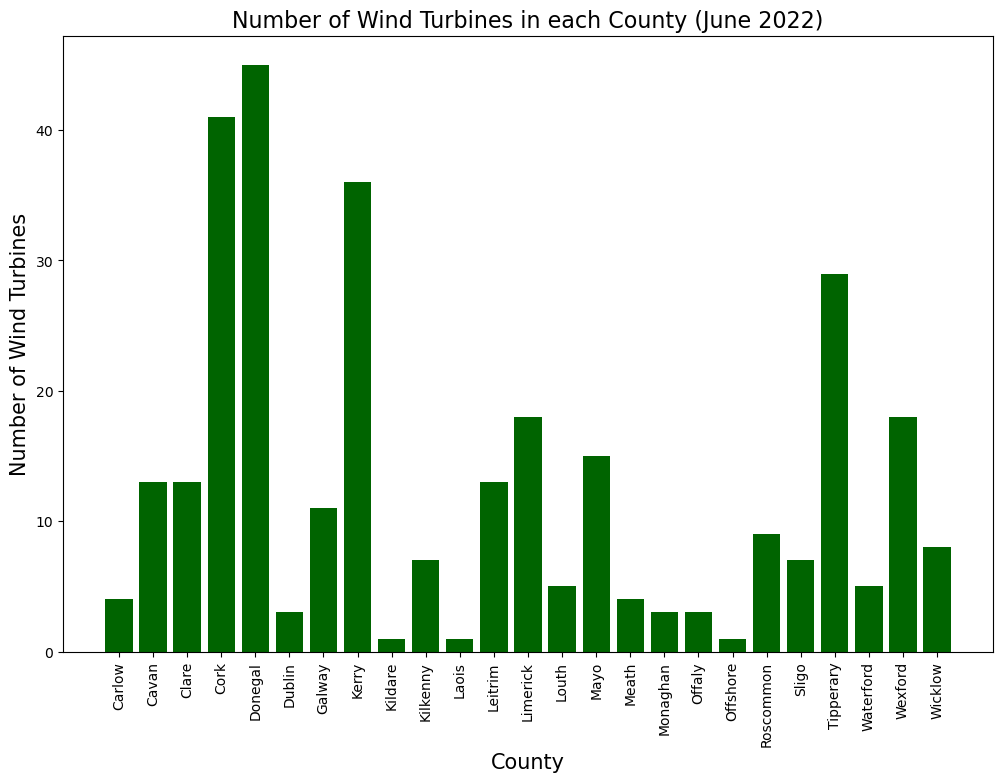

In [89]:
# Create a GeoDataFrame from the windfarm DataFrame
gdf_windturbines = gpd.read_file(dir3 + windfarms_shp)
df_windturbines = gdf_windturbines.groupby('County').size().reset_index(name='n_of_turbines')

# Plot the number of wind turbines in each county
plt.figure(figsize=(12, 8))
plt.bar(df_windturbines['County'], df_windturbines['n_of_turbines'], color='darkgreen')
plt.xlabel('County', fontsize=15)
plt.ylabel('Number of Wind Turbines', fontsize=15)
plt.title('Number of Wind Turbines in each County (June 2022)', fontsize=16)
plt.xticks(rotation=90)
plt.show()

C:\Users\caina\AppData\Local\Temp\ipykernel_19488\703466910.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(roi_map.geometry.centroid.x, roi_map.geometry.centroid.y, roi_map.NAME_1):


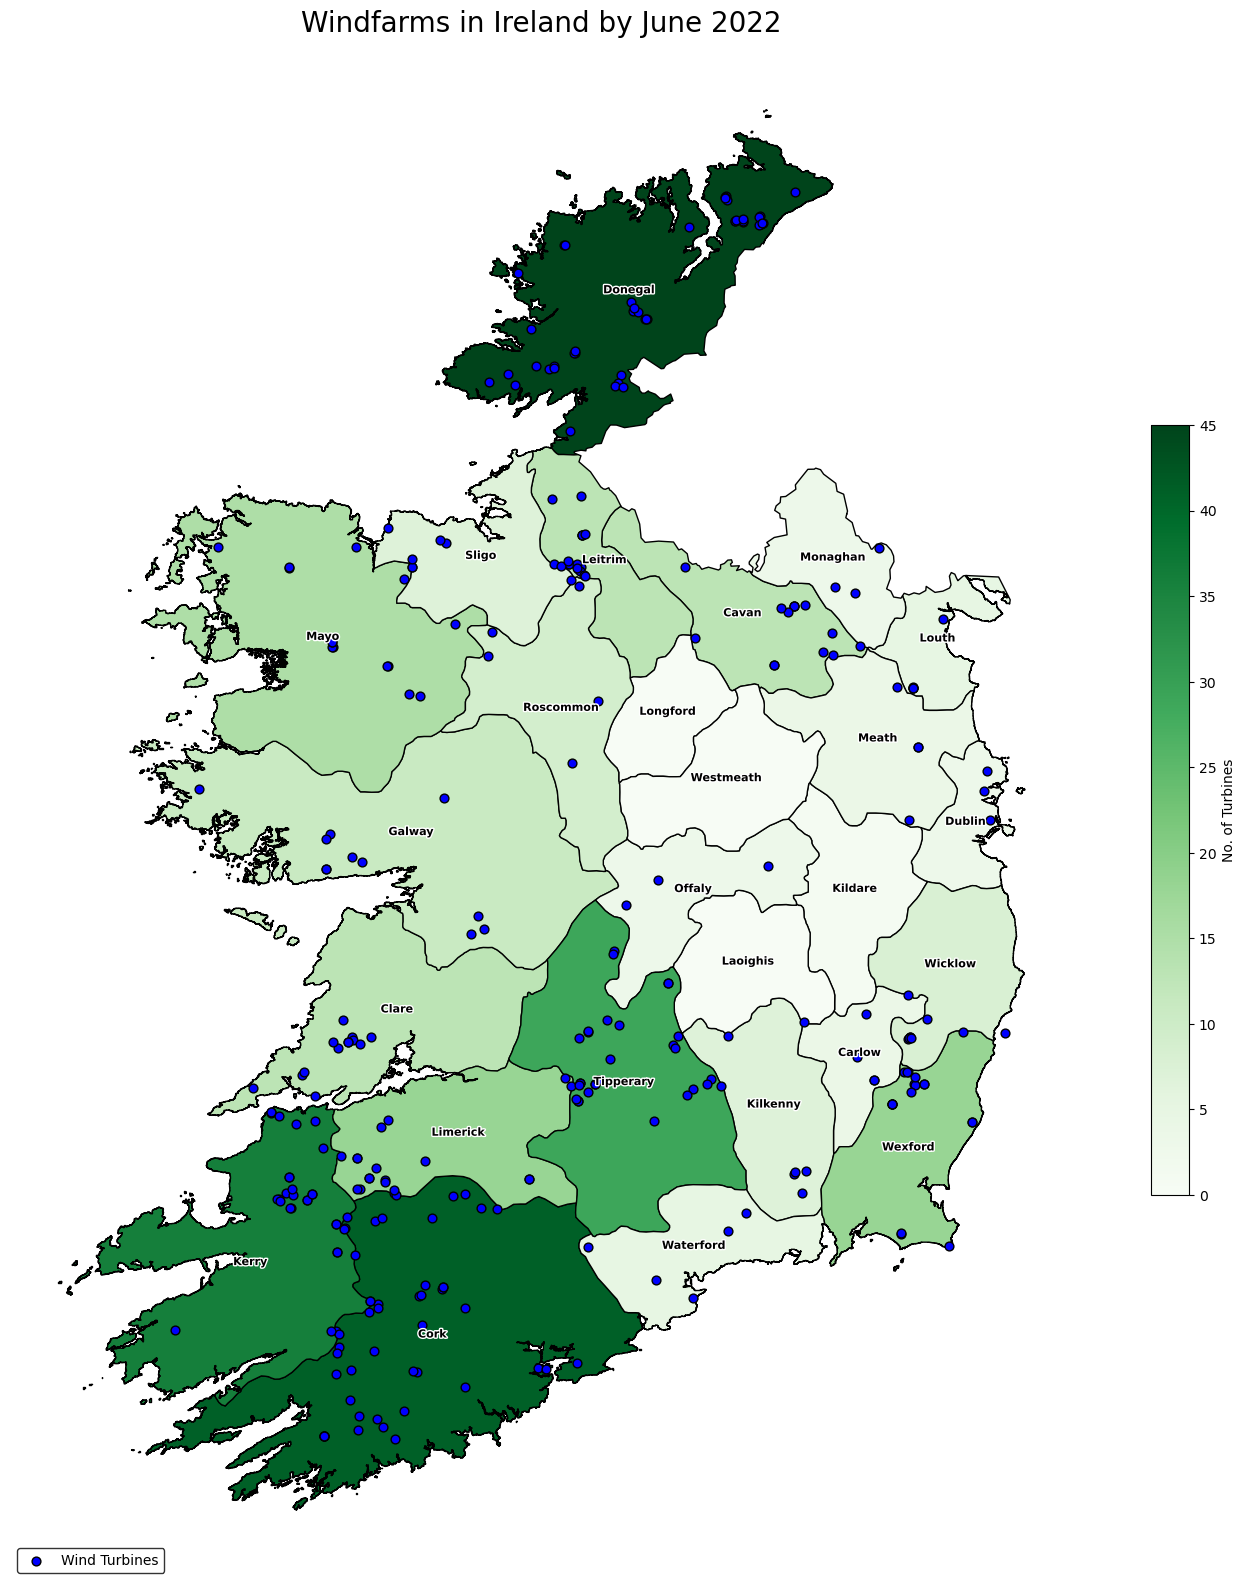

In [90]:
# Ensure the CRS of windturbines matches the desired CRS
gdf_windturbines = gdf_windturbines.to_crs('EPSG:4326')
gdf2 = gpd.GeoDataFrame(gdf_windturbines, crs='EPSG:4326')

# Read the map of Ireland
roi_map = gpd.read_file(dir2 + irl_map_shp)

# Merge roi_map with df_windturbines to include n_of_turbines
roi_map = roi_map.merge(df_windturbines[['County', 'n_of_turbines']], left_on='NAME_1', right_on='County', how='left')

# Replace NaN values with 0
roi_map['n_of_turbines'] = roi_map['n_of_turbines'].fillna(0)

# Plot the map of Ireland with a larger figure size
fig, ax = plt.subplots(figsize=(20, 20))
roi_map.plot(ax=ax, column='n_of_turbines', cmap='Greens', edgecolor="black", 
             legend=True, markersize=100, 
             legend_kwds={'label': "No. of Turbines", 
                          'shrink': 0.5})

# We can now plot our ``GeoDataFrame``.
gdf2.plot(ax=ax, color="blue", edgecolor="black", markersize=40)

# Add county names
for x, y, label in zip(roi_map.geometry.centroid.x, roi_map.geometry.centroid.y, roi_map.NAME_1):
    txt = ax.text(x, y, label, fontsize=8, ha='center', color='black', weight='bold')
    txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# Add a title
plt.title('Windfarms in Ireland by June 2022', fontsize=20)

# Remove the axis
plt.axis('off')

# Add legend
legend = ax.legend(["Wind Turbines"], loc='lower left', frameon=True)
legend.get_frame().set_edgecolor('black')
plt.show()

In [91]:
# Aggregate MEC__MW_ by County
df_windturbines_agg = gdf_windturbines.groupby('County')['MEC__MW_'].sum().reset_index()

# Mean MEC__MW_ by County
df_windturbines_mean = gdf_windturbines.groupby('County')['MEC__MW_'].mean().reset_index()

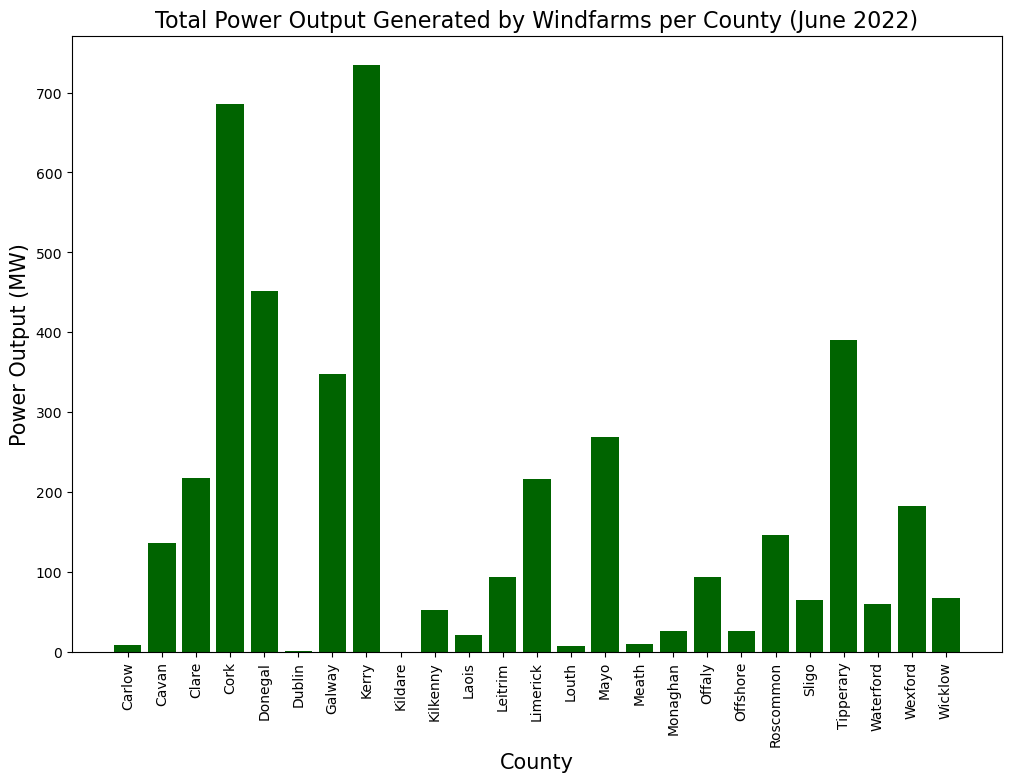

In [101]:
# Plot the number of wind turbines in each county
plt.figure(figsize=(12, 8))
plt.bar(df_windturbines_agg['County'], df_windturbines_agg['MEC__MW_'], color='darkgreen')
plt.xlabel('County', fontsize=15)
plt.ylabel('Power Output (MW)', fontsize=15)
plt.title('Total Power Output Generated by Windfarms per County (June 2022)', fontsize=16)
plt.xticks(rotation=90)
plt.show()

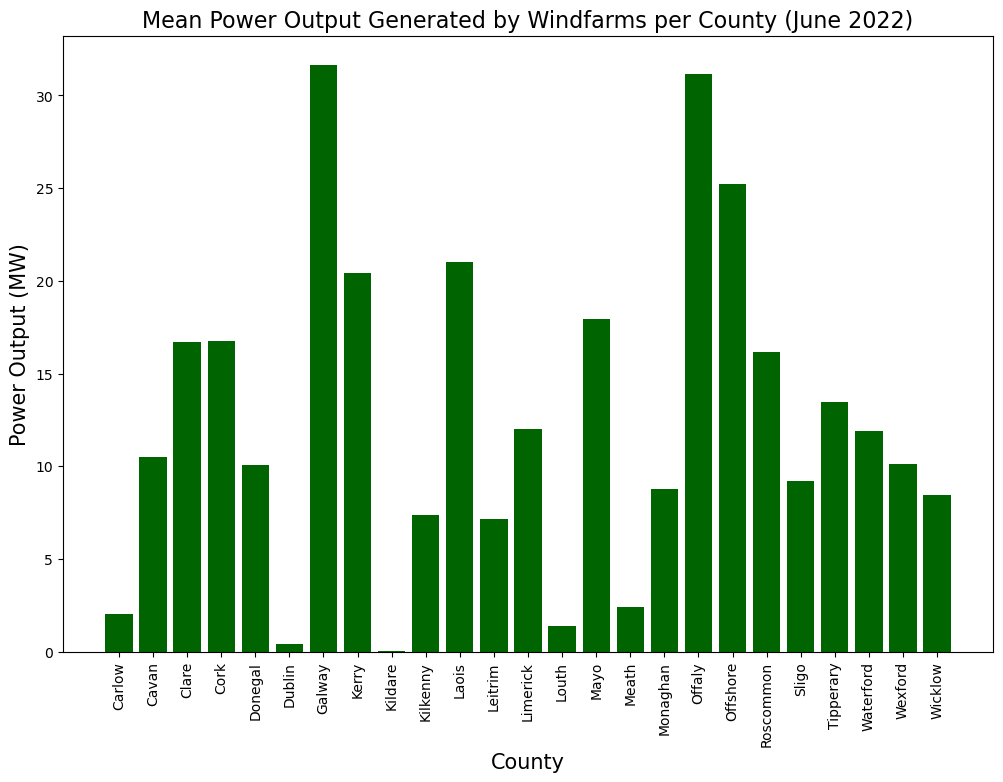

In [100]:
# Plot the number of wind turbines in each county
plt.figure(figsize=(12, 8))
plt.bar(df_windturbines_mean['County'], df_windturbines_mean['MEC__MW_'], color='darkgreen')
plt.xlabel('County', fontsize=15)
plt.ylabel('Power Output (MW)', fontsize=15)
plt.title('Mean Power Output Generated by Windfarms per County (June 2022)', fontsize=16)
plt.xticks(rotation=90)
plt.show()

C:\Users\caina\AppData\Local\Temp\ipykernel_19488\2961747682.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(roi_map.geometry.centroid.x, roi_map.geometry.centroid.y, roi_map.NAME_1):


(-10.896526646614074, -5.76013867855072, 51.218040657043574, 55.65195827484136)

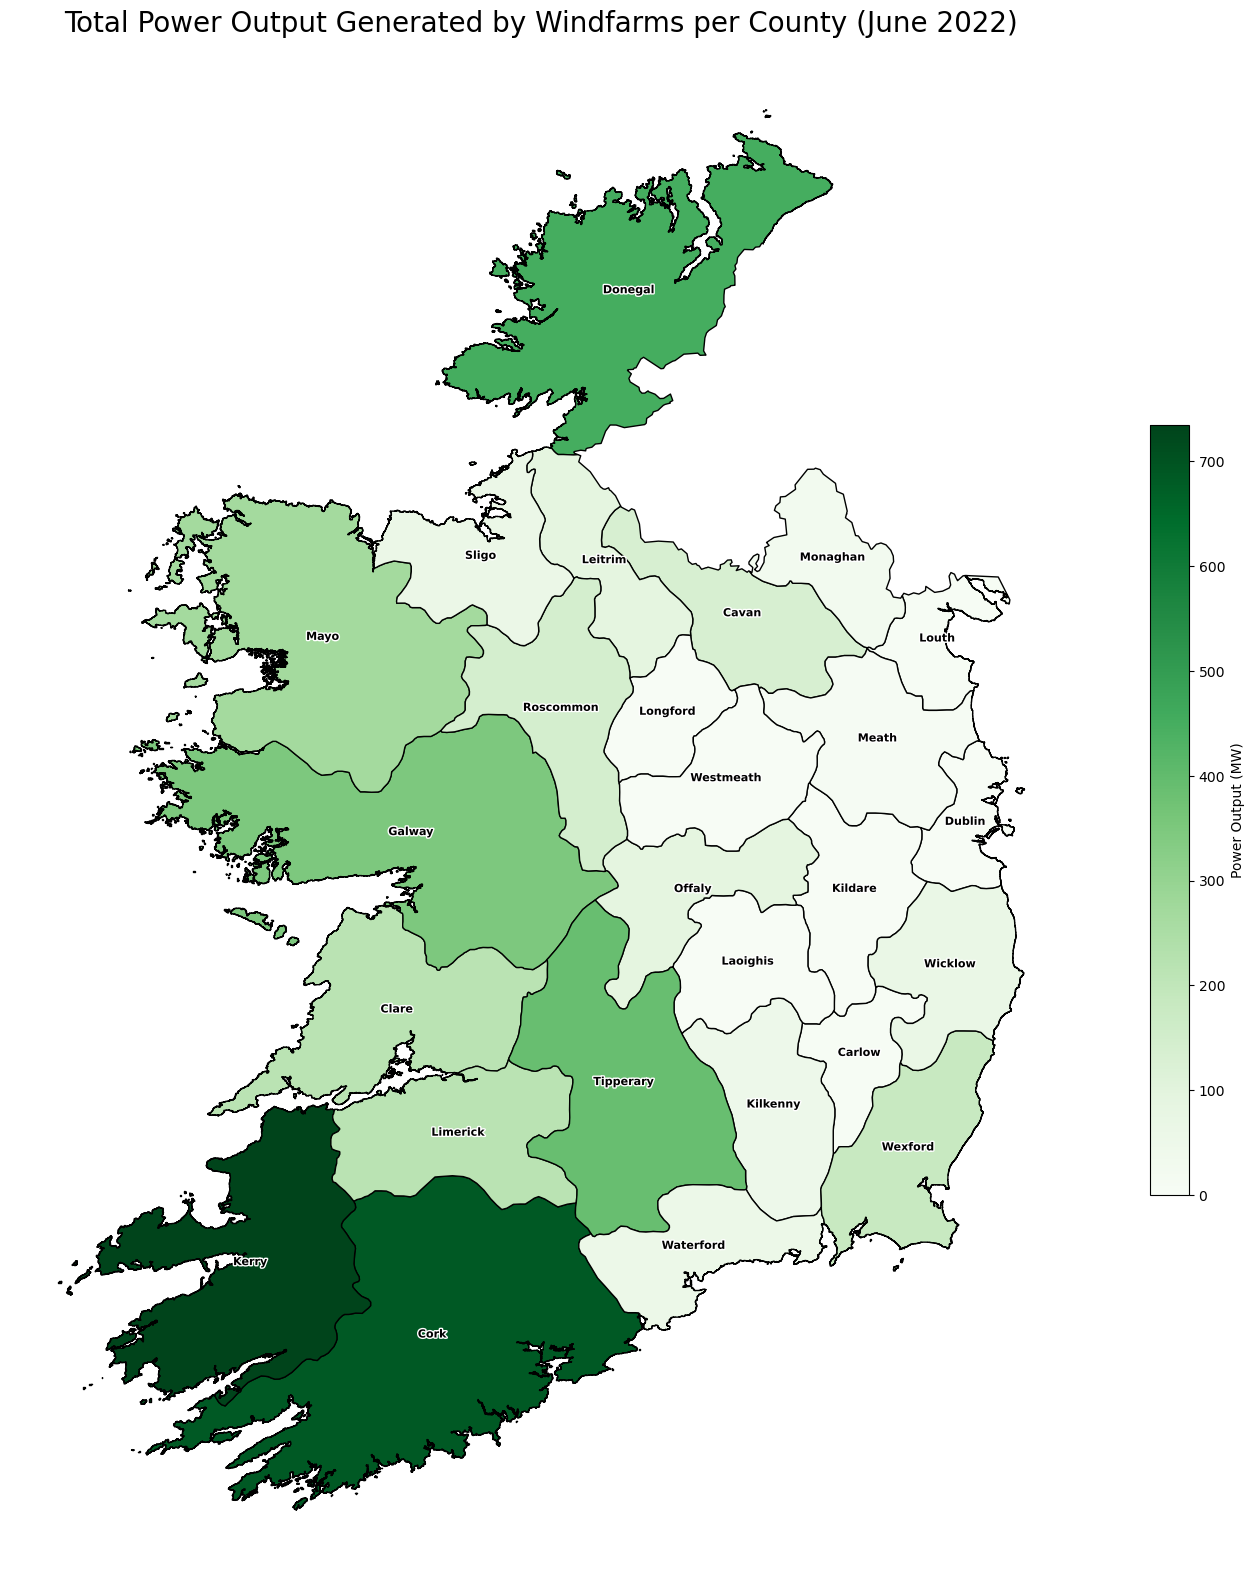

In [102]:
# Read the map of Ireland
roi_map = gpd.read_file(dir2 + irl_map_shp)

# Merge roi_map with df_windturbines_agg to include MEC__MW_
roi_map = roi_map.merge(df_windturbines_agg, left_on='NAME_1', right_on='County', how='left')

# Replace NaN values with 0
roi_map['MEC__MW_'] = roi_map['MEC__MW_'].fillna(0)

# Plot the map of Ireland with a larger figure size
fig, ax = plt.subplots(figsize=(20, 20))
roi_map.plot(ax=ax, column='MEC__MW_', cmap='Greens', edgecolor="black", 
             legend=True, markersize=100, 
             legend_kwds={'label': "Power Output (MW)", 
                          'shrink': 0.5})

# Add county names
for x, y, label in zip(roi_map.geometry.centroid.x, roi_map.geometry.centroid.y, roi_map.NAME_1):
    txt = ax.text(x, y, label, fontsize=8, ha='center', color='black', weight='bold')
    txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# Add a title
plt.title('Total Power Output Generated by Windfarms per County (June 2022)', fontsize=20)

# Remove the axis
plt.axis('off')

C:\Users\caina\AppData\Local\Temp\ipykernel_19488\3323061967.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(roi_map.geometry.centroid.x, roi_map.geometry.centroid.y, roi_map.NAME_1):


(-10.896526646614074, -5.76013867855072, 51.218040657043574, 55.65195827484136)

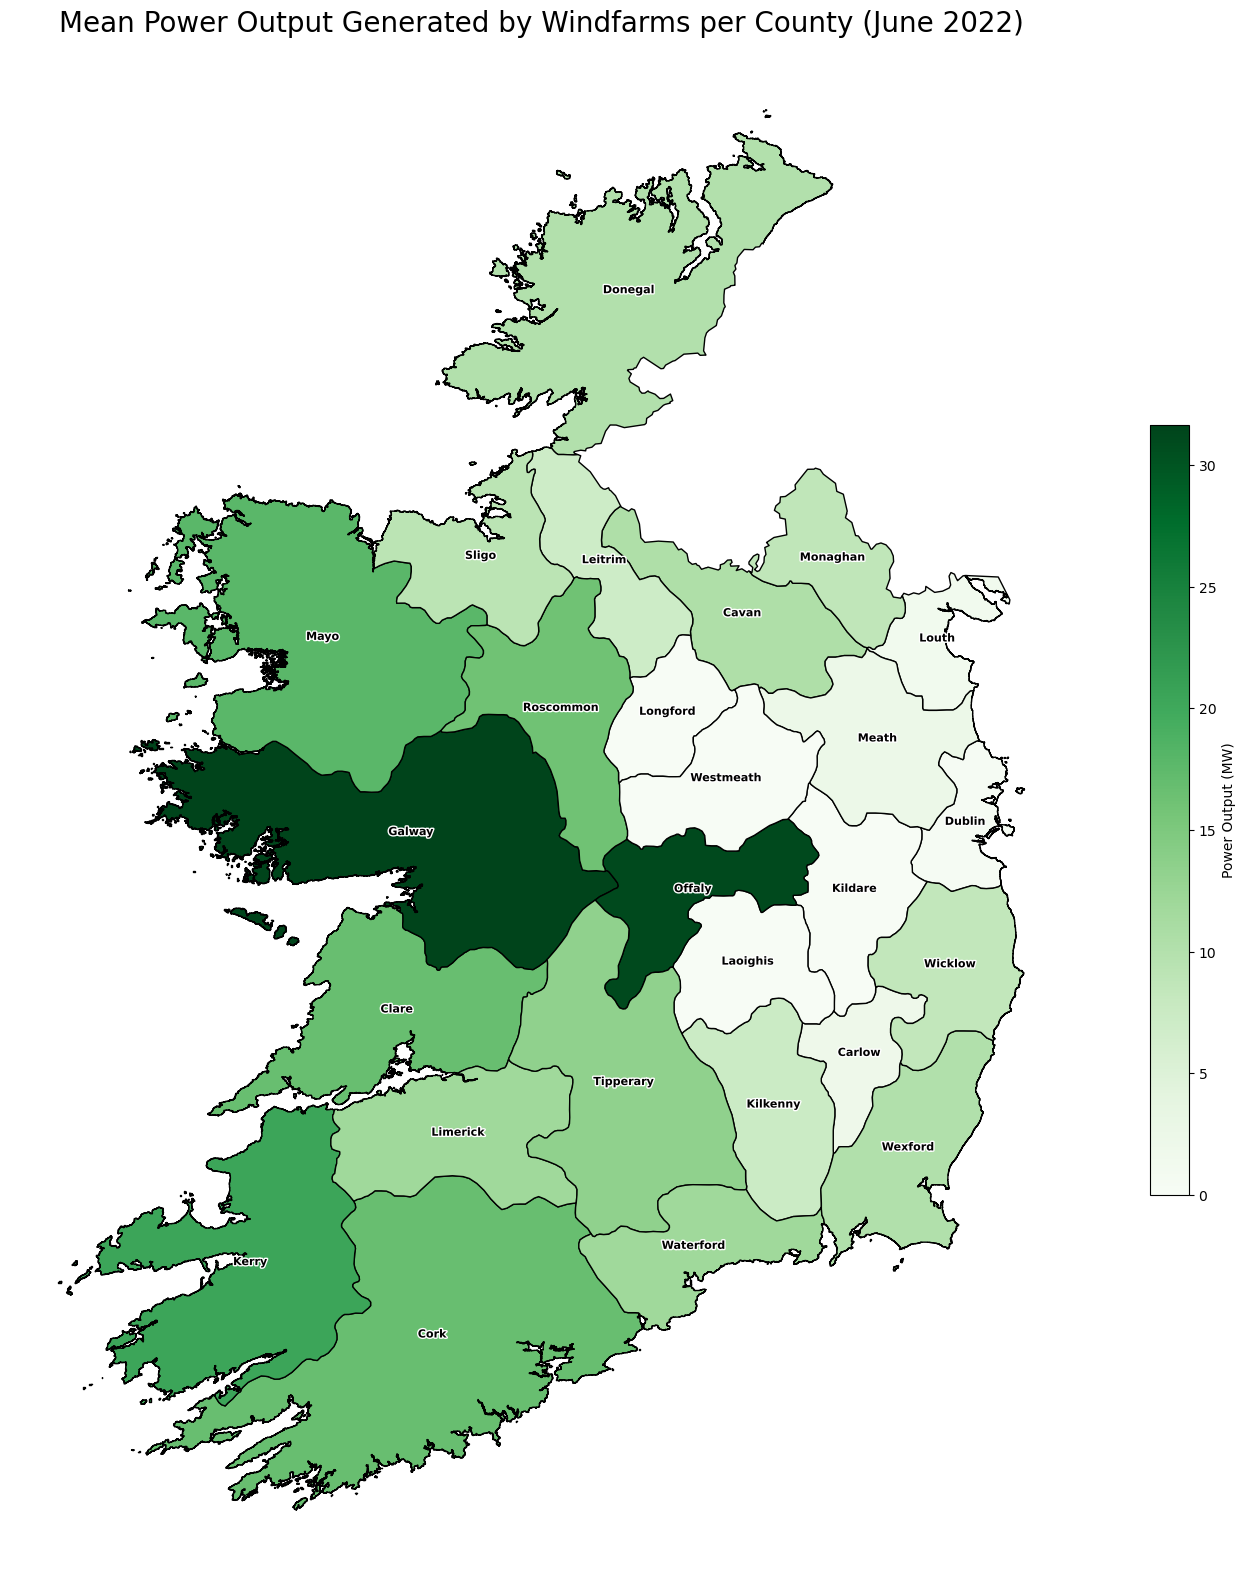

In [103]:
# Read the map of Ireland
roi_map = gpd.read_file(dir2 + irl_map_shp)


# Merge roi_map with df_windturbines_agg to include MEC__MW_
roi_map = roi_map.merge(df_windturbines_mean, left_on='NAME_1', right_on='County', how='left')

# Replace NaN values with 0
roi_map['MEC__MW_'] = roi_map['MEC__MW_'].fillna(0)

# Plot the map of Ireland with a larger figure size
fig, ax = plt.subplots(figsize=(20, 20))
roi_map.plot(ax=ax, column='MEC__MW_', cmap='Greens', edgecolor="black", 
             legend=True, markersize=100, 
             legend_kwds={'label': "Power Output (MW)", 
                          'shrink': 0.5})

# Add county names
for x, y, label in zip(roi_map.geometry.centroid.x, roi_map.geometry.centroid.y, roi_map.NAME_1):
    txt = ax.text(x, y, label, fontsize=8, ha='center', color='black', weight='bold')
    txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# Add a title
plt.title('Mean Power Output Generated by Windfarms per County (June 2022)', fontsize=20)

# Remove the axis
plt.axis('off')